# Distribution Testing

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import scipy.stats as stats
from scipy.interpolate import interp1d
import pickle
import altair as alt
import math
import contextily as ctx
import xarray as xr
from altair import datum

In [2]:
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

In [3]:
df_stations = pickle.load(open('../data/snv_dataframes/snv_temp_precip_cluster_gdf_snvs_quantiles.pkl','rb'))

### Plot Untransformed and natural log SWE distributions per cluster:

In [36]:
df_reset = df_stations[df_stations['cluster']==0].reset_index()

cluster0 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 0',width=200,height=200)

df_reset = df_stations[df_stations['cluster']==1].reset_index()
cluster1 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 1',width=200,height=200)

df_reset = df_stations[df_stations['cluster']==2].reset_index()
cluster2 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 2',width=200,height=200)

df_reset = df_stations[df_stations['cluster']==3].reset_index()
cluster3 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 3',width=200,height=200)

df_reset = df_stations[df_stations['cluster']==4].reset_index()
cluster4 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 4',width=200,height=200)

combined = alt.hconcat(cluster0, cluster1, cluster2, cluster3, cluster4)
combined

alt.HConcatChart(...)

In [37]:
df_reset = df_stations[df_stations['cluster']==0].reset_index()
cluster0 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 0',width=200,height=200)

df_reset = df_stations[df_stations['cluster']==1].reset_index()
cluster1 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 1',width=200,height=200)

df_reset = df_stations[df_stations['cluster']==2].reset_index()
cluster2 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 2',width=200,height=200)

df_reset = df_stations[df_stations['cluster']==3].reset_index()
cluster3 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 3',width=200,height=200)

df_reset = df_stations[df_stations['cluster']==4].reset_index()
cluster4 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 4',width=200,height=200)

combined = alt.hconcat(cluster0, cluster1, cluster2, cluster3, cluster4)
combined

alt.HConcatChart(...)

### Plot test site locations:

In [4]:
ucrb = pickle.load(open('../data/misc/ucrb.pkl','rb'))

In [17]:
# ucrb.geometry = ucrb.geometry.exterior
# line = ucrb['geometry']
# ucrb_poly = Polygon(line.get_coordinates())
# ucrb_poly_gdf = gpd.GeoDataFrame(crs='epsg:4326',geometry=[ucrb_poly])
# ucrb_poly_gdf.to_pickle('../../data/misc/ucrb.pkl')

In [5]:
wus = gpd.read_file('../data/misc/western_states.shp')
wus = wus.to_crs('epsg:4326')

In [512]:
df_stations[(df_stations.index.get_level_values(1)==1990) & (df_stations.index.get_level_values(0)=='380_CO_SNTL')]['reanalysis_cluster']

station      year
380_CO_SNTL  1990    3.0
Name: reanalysis_cluster, dtype: float64

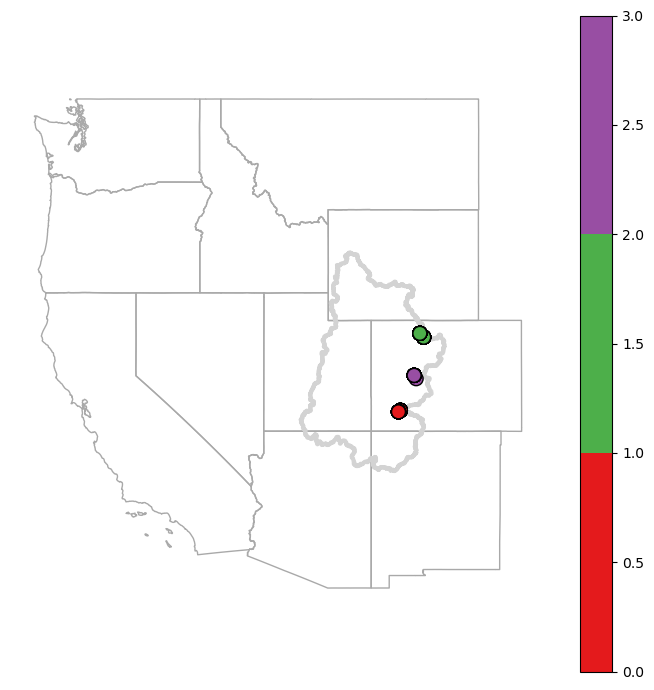

In [511]:
from matplotlib.colors import LinearSegmentedColormap
colors1=['#e41a1c','#4daf4a','#984ea3'] #,'#ffff33'
cmap1 = LinearSegmentedColormap.from_list('clusters', colors1, N = 3)

fig, ax = plt.subplots(figsize=(7,7))

wus.plot(ax=ax, facecolor='none', edgecolor='darkgrey', zorder=1)
ucrb.plot(ax=ax, facecolor='none', edgecolor='lightgrey', linewidth=3, zorder=2)
#ctx.add_basemap(ax=ax, crs='epsg:4326', source='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', zoom=8, attribution=False)

df_stations[(df_stations.index.get_level_values(1)==1990) & (df_stations.index.get_level_values(0)=='380_CO_SNTL') | (df_stations.index.get_level_values(0)=='737_CO_SNTL') | (df_stations.index.get_level_values(0)=='408_CO_SNTL') | (df_stations.index.get_level_values(0)=='457_CO_SNTL') | (df_stations.index.get_level_values(0)=='780_CO_SNTL') | (df_stations.index.get_level_values(0)=='632_CO_SNTL')].plot(column='reanalysis_cluster', ax=ax, markersize= 100, edgecolor='k', cmap=cmap1, zorder=3, legend=True)

ax.set_axis_off()
plt.tight_layout()

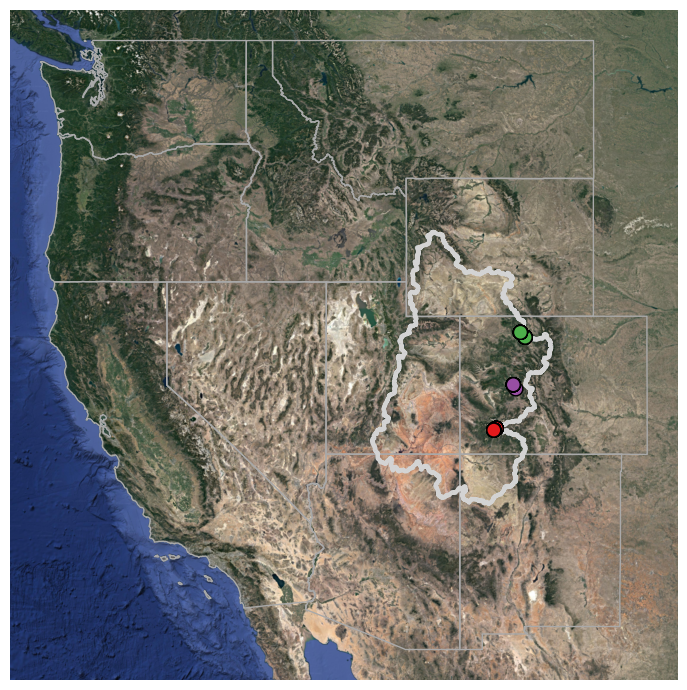

In [287]:
from matplotlib.colors import LinearSegmentedColormap
colors1=['#e41a1c','#4daf4a','#984ea3'] #,'#ffff33'
cmap1 = LinearSegmentedColormap.from_list('clusters', colors1, N = 3)

fig, ax = plt.subplots(figsize=(7,7))

wus.plot(ax=ax, facecolor='none', edgecolor='darkgrey', zorder=1)
ucrb.plot(ax=ax, facecolor='none', edgecolor='lightgrey', linewidth=3, zorder=2)
ctx.add_basemap(ax=ax, crs='epsg:4326', source='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', zoom=8, attribution=False)

df_stations[(df_stations.index.get_level_values(1)==1990) & (df_stations.index.get_level_values(0)=='380_CO_SNTL') | (df_stations.index.get_level_values(0)=='737_CO_SNTL') | (df_stations.index.get_level_values(0)=='408_CO_SNTL') | (df_stations.index.get_level_values(0)=='457_CO_SNTL') | (df_stations.index.get_level_values(0)=='780_CO_SNTL') | (df_stations.index.get_level_values(0)=='632_CO_SNTL')].plot(column='reanalysis_cluster', ax=ax, markersize= 100, edgecolor='k', cmap=cmap1, zorder=3)

ax.set_axis_off()

plt.tight_layout()
plt.savefig('../figures/ucrb_wus_map.jpeg',dpi=300)

### Plot Distributions of stations in first pair:

In [7]:
site1 = '380_CO_SNTL' # Butte station
site2 = '737_CO_SNTL' # Schofield Pass station

In [9]:
df_reset = df_stations.loc[pd.IndexSlice[site1]]
site1_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Butte Untransformed SWE',width=200,height=200)

df_reset = df_stations.loc[pd.IndexSlice[site1]]
site1_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Butte Natural Log of SWE',width=200,height=200)

df_reset = df_stations.loc[pd.IndexSlice[site2]]
site2_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Schofield Untransformed SWE',width=200,height=200)

df_reset = df_stations.loc[pd.IndexSlice[site2]]
site2_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Schofield Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site1_unt, site1_ln, site2_unt, site2_ln)
combined

alt.HConcatChart(...)

In [10]:
np.sqrt(32)

5.656854249492381

### Predict SWE at Butte using: 

In [301]:
site1 = '380_CO_SNTL' # Butte station
site2 = '737_CO_SNTL' # Schofield Pass station

#### SWE mapping from Schofield Pass

In [302]:
df_butte_pred = pd.DataFrame(df_stations.loc[pd.IndexSlice[site1],'station_swe'])
df_butte_pred = df_butte_pred.rename(columns={'station_swe':'butte_swe'})
df_butte_pred['schofield_swe'] = df_stations.loc[pd.IndexSlice[site2], 'station_swe']

#### SNV method on untransformed data from Schofield Pass:

In [303]:
# swe_pred = (df.loc[pd.IndexSlice[site2],'station_n'] * df.loc[pd.IndexSlice[site1],'reanalysis_swe'].std()) + df.loc[pd.IndexSlice[site1],'reanalysis_swe'].mean()

In [304]:
df_butte_pred['butte_pred_snv'] = np.nan
for year in np.arange(1990,2022):
    df_butte_pred.loc[(df_butte_pred.index==year), 'butte_pred_snv'] = (df_stations.loc[(df_stations.index.get_level_values(1) == year) & (df_stations.index.get_level_values(0) == site2),'station_n'].values[0] * df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'reanalysis_swe'].std()) + df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'reanalysis_swe'].mean()

#### SNV method on log data from Schofield Pass:

In [305]:
df_butte_pred['butte_pred_snv_log'] = np.nan
for year in np.arange(1990,2022):
    df_butte_pred.loc[(df_butte_pred.index==year), 'butte_pred_snv_log'] = math.e ** ((df_stations.loc[(df_stations.index.get_level_values(1) == year) & (df_stations.index.get_level_values(0) == site2),'log_station_n'].values[0] * df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'log_reanalysis_swe'].std()) + df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'log_reanalysis_swe'].mean()) 

#### Quantile method:

In [306]:
df_butte_pred['butte_pred_quantile'] = np.nan

quantiles = np.linspace(0,1,100)

for year in np.arange(1990, 2022):
    q = df_stations.loc[(df_stations.index.get_level_values(0)==site2) & (df_stations.index.get_level_values(1)==year)]['quantile_q8']
    cdf = np.quantile(df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1)]['station_swe'], quantiles, method='median_unbiased')
    df_butte_pred.loc[(df_butte_pred.index == year),'butte_pred_quantile'] = np.interp(q, quantiles, np.sort(cdf))

#### Prism cumulative precip:

In [307]:
# prism_precip = xr.open_dataset('../data/calculated_swe/prism/calculated_swe_prism_cumulative_coldseason_precip.nc')
# prism_precip = prism_precip.__xarray_dataarray_variable__[1:]
# prism_precip.to_netcdf('../data/calculated_swe/prism/calculated_swe_prism_cumulative_coldseason_precip_clean.nc')

In [308]:
prism_precip = xr.open_dataset('../data/calculated_swe/prism/calculated_swe_prism_cumulative_coldseason_precip_clean.nc')
prism_precip = prism_precip.__xarray_dataarray_variable__

In [309]:
x = df_stations[(df_stations.index.get_level_values(0) == site1) & (df_stations.index.get_level_values(1) == 1990)].geometry.x.values[0]
y = df_stations[(df_stations.index.get_level_values(0) == site1) & (df_stations.index.get_level_values(1) == 1990)].geometry.y.values[0]

In [310]:
df_butte_pred['butte_pred_precip'] = prism_precip.sel(x=x, y=y, method = 'nearest').values

### Calculate metrics:

In [311]:
df_butte_pred['difference_swe'] = df_butte_pred['butte_swe'] - df_butte_pred['schofield_swe']
df_butte_pred['difference_snv'] = df_butte_pred['butte_swe'] - df_butte_pred['butte_pred_snv']
df_butte_pred['difference_snv_log'] = df_butte_pred['butte_swe'] - df_butte_pred['butte_pred_snv_log']
df_butte_pred['difference_quantile'] = df_butte_pred['butte_swe'] - df_butte_pred['butte_pred_quantile']
df_butte_pred['difference_precip'] = df_butte_pred['butte_swe'] - df_butte_pred['butte_pred_precip']

In [312]:
station_list = ['Butte','Butte','Butte','Butte','Butte','Dry Lake', 'Dry Lake','Dry Lake','Dry Lake','Dry Lake','Molas Lake','Molas Lake','Molas Lake','Molas Lake','Molas Lake']
methods = ['SWE Mapping','SNV Mapping','Natural Log SNV', 'Quantile Mapping', 'Cumulative Precip','SWE Mapping','SNV Mapping','Natural Log SNV', 'Quantile Mapping','Cumulative Precip','SWE Mapping','SNV Mapping','Natural Log SNV', 'Quantile Mapping','Cumulative Precip']

tuples = list(zip(station_list, methods))

metrics_index = pd.MultiIndex.from_tuples(tuples, names=["station", "method"])

In [313]:
metrics_df = pd.DataFrame(columns=[['R','MD','RMSE']], index=metrics_index)
metrics_df

R   MD RMSE
station    method                          
Butte      SWE Mapping        NaN  NaN  NaN
           SNV Mapping        NaN  NaN  NaN
           Natural Log SNV    NaN  NaN  NaN
           Quantile Mapping   NaN  NaN  NaN
           Cumulative Precip  NaN  NaN  NaN
Dry Lake   SWE Mapping        NaN  NaN  NaN
           SNV Mapping        NaN  NaN  NaN
           Natural Log SNV    NaN  NaN  NaN
           Quantile Mapping   NaN  NaN  NaN
           Cumulative Precip  NaN  NaN  NaN
Molas Lake SWE Mapping        NaN  NaN  NaN
           SNV Mapping        NaN  NaN  NaN
           Natural Log SNV    NaN  NaN  NaN
           Quantile Mapping   NaN  NaN  NaN
           Cumulative Precip  NaN  NaN  NaN

In [314]:
# SWE Mapping
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='SWE Mapping'), 'MD'] = df_butte_pred['difference_swe'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='SWE Mapping'), 'RMSE'] = np.sqrt((df_butte_pred['difference_swe']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='SWE Mapping'), 'R'] = np.corrcoef(df_butte_pred['butte_swe'], df_butte_pred['schofield_swe'])[0,1]

# Untransformed SNV
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='SNV Mapping'), 'MD'] = df_butte_pred['difference_snv'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='SNV Mapping'), 'RMSE'] = np.sqrt((df_butte_pred['difference_snv']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='SNV Mapping'), 'R'] = np.corrcoef(df_butte_pred['butte_swe'], df_butte_pred['butte_pred_snv'])[0,1]

# Log SNV
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'MD'] = df_butte_pred['difference_snv_log'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'RMSE'] = np.sqrt((df_butte_pred['difference_snv_log']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'R'] = np.corrcoef(df_butte_pred['butte_swe'], df_butte_pred['butte_pred_snv_log'])[0,1]

# Quantile Mapping
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'MD'] = df_butte_pred['difference_quantile'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'RMSE'] = np.sqrt((df_butte_pred['difference_quantile']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'R'] = np.corrcoef(df_butte_pred['butte_swe'], df_butte_pred['butte_pred_quantile'])[0,1]

# Cumulative Precipitation
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Cumulative Precip'), 'MD'] = df_butte_pred['difference_precip'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Cumulative Precip'), 'RMSE'] = np.sqrt((df_butte_pred['difference_precip']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Cumulative Precip'), 'R'] = np.corrcoef(df_butte_pred['butte_swe'], df_butte_pred['butte_pred_precip'])[0,1]

In [315]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(pd.melt(df_butte_pred, id_vars=['butte_swe'], value_vars=['schofield_swe', 'butte_pred_snv',
       'butte_pred_quantile', 'butte_pred_precip'])).mark_circle().encode(
        x = alt.X('butte_swe').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('value').title('Predicted SWE (m) at Butte'),
        color=alt.Color('variable')
    ).properties(title='Predicted SWE at Butte')

combined = (station_predict + line2) 
combined

alt.LayerChart(...)

### Predict SWE at Dry Lake using: 

In [316]:
site1 = '457_CO_SNTL' #Dry Lake
site2 = '408_CO_SNTL' #Columbine

#### SWE mapping from Columbine

In [317]:
df_drylake_pred = pd.DataFrame(df_stations.loc[pd.IndexSlice[site1],'station_swe'])
df_drylake_pred = df_drylake_pred.rename(columns={'station_swe':'drylake_swe'})
df_drylake_pred['columbine_swe'] = df_stations.loc[pd.IndexSlice[site2], 'station_swe']

#### SNV method on untransformed data from Schofield Pass:

In [318]:
df_drylake_pred['drylake_pred_snv'] = np.nan
for year in np.arange(1990,2022):
    df_drylake_pred.loc[(df_drylake_pred.index==year), 'drylake_pred_snv'] = (df_stations.loc[(df_stations.index.get_level_values(1) == year) & (df_stations.index.get_level_values(0) == site2),'station_n'].values[0] * df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'reanalysis_swe'].std()) + df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'reanalysis_swe'].mean()

#### SNV method on log data from Schofield Pass:

In [319]:
df_drylake_pred['drylake_pred_snv_log'] = np.nan
for year in np.arange(1990,2022):
    df_drylake_pred.loc[(df_butte_pred.index==year), 'drylake_pred_snv_log'] = math.e ** ((df_stations.loc[(df_stations.index.get_level_values(1) == year) & (df_stations.index.get_level_values(0) == site2),'log_station_n'].values[0] * df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'log_reanalysis_swe'].std()) + df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'log_reanalysis_swe'].mean()) 

#### Quantile method:

In [320]:
df_drylake_pred['drylake_pred_quantile'] = np.nan

quantiles = np.linspace(0,1,100)

for year in np.arange(1990, 2022):
    q = df_stations.loc[(df_stations.index.get_level_values(0)==site2) & (df_stations.index.get_level_values(1)==year)]['quantile_q8']
    cdf = np.quantile(df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1)]['station_swe'], quantiles, method='median_unbiased')
    df_drylake_pred.loc[(df_drylake_pred.index == year),'drylake_pred_quantile'] = np.interp(q, quantiles, np.sort(cdf))

#### Prism cumulative precip:

In [321]:
# prism_precip = xr.open_dataset('../data/calculated_swe/prism/calculated_swe_prism_cumulative_coldseason_precip_clean.nc')
# prism_precip = prism_precip.__xarray_dataarray_variable__

In [322]:
x = df_stations[(df_stations.index.get_level_values(0) == site1) & (df_stations.index.get_level_values(1) == 1990)].geometry.x.values[0]
y = df_stations[(df_stations.index.get_level_values(0) == site1) & (df_stations.index.get_level_values(1) == 1990)].geometry.y.values[0]

In [323]:
df_drylake_pred['drylake_pred_precip'] = prism_precip.sel(x=x, y=y, method = 'nearest').values

### Calculate metrics:

In [324]:
df_drylake_pred['difference_swe'] = df_drylake_pred['drylake_swe'] - df_drylake_pred['columbine_swe']
df_drylake_pred['difference_snv'] = df_drylake_pred['drylake_swe'] - df_drylake_pred['drylake_pred_snv']
df_drylake_pred['difference_snv_log'] = df_drylake_pred['drylake_swe'] - df_drylake_pred['drylake_pred_snv_log']
df_drylake_pred['difference_quantile'] = df_drylake_pred['drylake_swe'] - df_drylake_pred['drylake_pred_quantile']
df_drylake_pred['difference_precip'] = df_drylake_pred['drylake_swe'] - df_drylake_pred['drylake_pred_precip']

In [325]:
# SWE Mapping
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='SWE Mapping'), 'MD'] = df_drylake_pred['difference_swe'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='SWE Mapping'), 'RMSE'] = np.sqrt((df_drylake_pred['difference_swe']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='SWE Mapping'), 'R'] = np.corrcoef(df_drylake_pred['drylake_swe'], df_drylake_pred['columbine_swe'])[0,1]

# Untransformed SNV
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='SNV Mapping'), 'MD'] = df_drylake_pred['difference_snv'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='SNV Mapping'), 'RMSE'] = np.sqrt((df_drylake_pred['difference_snv']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='SNV Mapping'), 'R'] = np.corrcoef(df_drylake_pred['drylake_swe'], df_drylake_pred['drylake_pred_snv'])[0,1]

# Log SNV
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'MD'] = df_drylake_pred['difference_snv_log'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'RMSE'] = np.sqrt((df_drylake_pred['difference_snv_log']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'R'] = np.corrcoef(df_drylake_pred['drylake_swe'], df_drylake_pred['drylake_pred_snv_log'])[0,1]

# Quantile Mapping
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'MD'] = df_drylake_pred['difference_quantile'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'RMSE'] = np.sqrt((df_drylake_pred['difference_quantile']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'R'] = np.corrcoef(df_drylake_pred['drylake_swe'], df_drylake_pred['drylake_pred_quantile'])[0,1]

# Cumulative Precipitation
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Cumulative Precip'), 'MD'] = df_drylake_pred['difference_precip'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Cumulative Precip'), 'RMSE'] = np.sqrt((df_drylake_pred['difference_precip']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Cumulative Precip'), 'R'] = np.corrcoef(df_drylake_pred['drylake_swe'], df_drylake_pred['drylake_pred_precip'])[0,1]

In [326]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(pd.melt(df_drylake_pred, id_vars=['drylake_swe'], value_vars=['columbine_swe', 'drylake_pred_snv',
       'drylake_pred_quantile', 'drylake_pred_precip'])).mark_circle().encode(
        x = alt.X('drylake_swe').title('drylake SNOTEL SWE (m)'), 
        y = alt.Y('value').title('Predicted SWE (m) at drylake'),
        color=alt.Color('variable')
    ).properties(title='Predicted SWE at drylake')

combined = (station_predict + line2) 
combined

alt.LayerChart(...)

### Predict SWE at Molas Lake using: 

In [327]:
site1 = '632_CO_SNTL' #Molas Lake
site2 = '780_CO_SNTL' #Spud Mountain

#### SWE mapping from Spud Mountain

In [328]:
df_molas_pred = pd.DataFrame(df_stations.loc[pd.IndexSlice[site1],'station_swe'])
df_molas_pred = df_molas_pred.rename(columns={'station_swe':'molas_swe'})
df_molas_pred['spud_swe'] = df_stations.loc[pd.IndexSlice[site2], 'station_swe']

#### SNV method on untransformed data from Schofield Pass:

In [329]:
df_molas_pred['molas_pred_snv'] = np.nan
for year in np.arange(1990,2022):
    df_molas_pred.loc[(df_molas_pred.index==year), 'molas_pred_snv'] = (df_stations.loc[(df_stations.index.get_level_values(1) == year) & (df_stations.index.get_level_values(0) == site2),'station_n'].values[0] * df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'reanalysis_swe'].std()) + df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'reanalysis_swe'].mean()

#### SNV method on log data from Schofield Pass:

In [330]:
df_molas_pred['molas_pred_snv_log'] = np.nan
for year in np.arange(1990,2022):
    df_molas_pred.loc[(df_butte_pred.index==year), 'molas_pred_snv_log'] = math.e ** ((df_stations.loc[(df_stations.index.get_level_values(1) == year) & (df_stations.index.get_level_values(0) == site2),'log_station_n'].values[0] * df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'log_reanalysis_swe'].std()) + df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1),'log_reanalysis_swe'].mean()) 

#### Quantile method:

In [331]:
df_molas_pred['molas_pred_quantile'] = np.nan

quantiles = np.linspace(0,1,100)

for year in np.arange(1990, 2022):
    q = df_stations.loc[(df_stations.index.get_level_values(0)==site2) & (df_stations.index.get_level_values(1)==year)]['quantile_q8']
    cdf = np.quantile(df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1)]['station_swe'], quantiles, method='median_unbiased')
    df_molas_pred.loc[(df_molas_pred.index == year),'molas_pred_quantile'] = np.interp(q, quantiles, np.sort(cdf))

#### Prism cumulative precip:

In [332]:
# prism_precip = xr.open_dataset('../data/calculated_swe/prism/calculated_swe_prism_cumulative_coldseason_precip_clean.nc')
# prism_precip = prism_precip.__xarray_dataarray_variable__

In [333]:
x = df_stations[(df_stations.index.get_level_values(0) == site1) & (df_stations.index.get_level_values(1) == 1990)].geometry.x.values[0]
y = df_stations[(df_stations.index.get_level_values(0) == site1) & (df_stations.index.get_level_values(1) == 1990)].geometry.y.values[0]

In [334]:
df_molas_pred['molas_pred_precip'] = prism_precip.sel(x=x, y=y, method = 'nearest').values

### Calculate metrics:

In [335]:
df_molas_pred['difference_swe'] = df_molas_pred['molas_swe'] - df_molas_pred['spud_swe']
df_molas_pred['difference_snv'] = df_molas_pred['molas_swe'] - df_molas_pred['molas_pred_snv']
df_molas_pred['difference_snv_log'] = df_molas_pred['molas_swe'] - df_molas_pred['molas_pred_snv_log']
df_molas_pred['difference_quantile'] = df_molas_pred['molas_swe'] - df_molas_pred['molas_pred_quantile']
df_molas_pred['difference_precip'] = df_molas_pred['molas_swe'] - df_molas_pred['molas_pred_precip']

In [336]:
# SWE Mapping
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='SWE Mapping'), 'MD'] = df_molas_pred['difference_swe'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='SWE Mapping'), 'RMSE'] = np.sqrt((df_molas_pred['difference_swe']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='SWE Mapping'), 'R'] = np.corrcoef(df_molas_pred['molas_swe'], df_molas_pred['spud_swe'])[0,1]

# Untransformed SNV
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='SNV Mapping'), 'MD'] = df_molas_pred['difference_snv'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='SNV Mapping'), 'RMSE'] = np.sqrt((df_molas_pred['difference_snv']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='SNV Mapping'), 'R'] = np.corrcoef(df_molas_pred['molas_swe'], df_molas_pred['molas_pred_snv'])[0,1]

# Log SNV
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'MD'] = df_molas_pred['difference_snv_log'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'RMSE'] = np.sqrt((df_molas_pred['difference_snv_log']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'R'] = np.corrcoef(df_molas_pred['molas_swe'], df_molas_pred['molas_pred_snv_log'])[0,1]

# Quantile Mapping
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'MD'] = df_molas_pred['difference_quantile'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'RMSE'] = np.sqrt((df_molas_pred['difference_quantile']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'R'] = np.corrcoef(df_molas_pred['molas_swe'], df_molas_pred['molas_pred_quantile'])[0,1]

# Cumulative Precipitation
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='Cumulative Precip'), 'MD'] = df_molas_pred['difference_precip'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='Cumulative Precip'), 'RMSE'] = np.sqrt((df_molas_pred['difference_precip']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Molas Lake') & (metrics_df.index.get_level_values(1)=='Cumulative Precip'), 'R'] = np.corrcoef(df_molas_pred['molas_swe'], df_molas_pred['molas_pred_precip'])[0,1]

In [337]:
df_molas_pred

molas_swe  spud_swe  molas_pred_snv  molas_pred_snv_log  \
year                                                            
1990    0.31496   0.28702        0.147078            0.129179   
1991    0.60452   0.77470        0.473274            0.495264   
1992    0.35306   0.68326        0.406282            0.411297   
1993    0.76962   1.15570        0.722691            0.838211   
1994    0.45974   0.53340        0.309470            0.297128   
1995    0.77470   0.99822        0.620554            0.691587   
1996    0.47752   0.52578        0.302145            0.289492   
1997    0.64770   0.71374        0.425003            0.434711   
1998    0.44958   0.59436        0.343041            0.337569   
1999    0.46228   0.34798        0.186517            0.166838   
2000    0.44450   0.53340        0.306902            0.294919   
2001    0.46736   0.60452        0.357971            0.353056   
2002    0.21336   0.23368        0.112343            0.098240   
2003    0.39116   0.49784        0.283519            0.268860   
2004    0.45974   0.52070        0.301732            0.288267   
2005    0.71120   1.01092        0.622324            0.695361   
2006    0.44704   0.49784        0.283746            0.269029   
2007    0.32258   0.39116        0.222563            0.203737   
2008    0.69850   0.85598        0.514306            0.551025   
2009    0.56388   0.59944        0.355005            0.349568   
2010    0.43434   0.63500        0.377772            0.376555   
2011    0.51816   0.71374        0.429361            0.439291   
2012    0.26416   0.33274        0.182117            0.162112   
2013    0.31750   0.48514        0.288857            0.284646   
2014    0.56896   0.55372        0.312568            0.303970   
2015    0.33020   0.31242        0.161077            0.143156   
2016    0.37084   0.46482        0.262908            0.245939   
2017    0.61976   0.76708        0.462316            0.480936   
2018    0.27940   0.30226        0.163191            0.144184   
2019    0.69596   0.95504        0.584469            0.643218   
2020    0.44450   0.59436        0.346139            0.340054   
2021    0.37846   0.52578        0.304735            0.291717   

      molas_pred_quantile  molas_pred_precip  difference_swe  difference_snv  \
year                                                                           
1990             0.262126           0.271493         0.02794        0.167882   
1991             0.649023           0.350208        -0.17018        0.131246   
1992             0.565581           0.211846        -0.33020       -0.053222   
1993             0.774700           0.239724        -0.38608        0.046929   
1994             0.447570           0.249743        -0.07366        0.150270   
1995             0.700091           0.481186        -0.22352        0.154146   
1996             0.444500           0.304353        -0.04826        0.175375   
1997             0.571474           0.286439        -0.06604        0.222697   
1998             0.464179           0.236558        -0.14478        0.106539   
1999             0.321396           0.340582         0.11430        0.275763   
2000             0.451701           0.418052        -0.08890        0.137598   
2001             0.489381           0.308239        -0.13716        0.109389   
2002             0.264160           0.416578        -0.02032        0.101017   
2003             0.404236           0.371044        -0.10668        0.107641   
2004             0.421485           0.279228        -0.06096        0.158008   
2005             0.760434           0.282515        -0.29972        0.088876   
2006             0.384318           0.407989        -0.05080        0.163294   
2007             0.347472           0.379880        -0.06858        0.100017   
2008             0.654563           0.410487        -0.15748        0.184194   
2009             0.464270           0.291695        -0.03556        0.208875   
2010             0.531875          

In [248]:
swe = xr.open_dataset('../data/reanalysis/swe_reanalysis_ucrb.nc')

In [258]:
df_stations.columns

Index(['station_n', 'reanalysis_n', 'elevation_m', 'station_swe',
       'station_swe_mean', 'reanalysis_swe', 'deg_days_0C', 'cold_deg_days',
       'cumulative_precip_m', 'precip_mean', 'precip_std', 'precip_n',
       'log_cumulative_precip_m', 'log_reanalysis_swe', 'log_station_swe',
       'log_precip_mean', 'log_station_swe_mean', 'log_reanalysis_swe_mean',
       'log_precip_std', 'log_station_swe_std', 'log_reanalysis_swe_std',
       'log_precip_n', 'log_station_n', 'log_reanalysis_n', 'latitude',
       'longitude', 'geometry', 'cluster', 'sampled_reanalysis_cluster',
       'reanalysis_cluster', 'quantile', 'quantile_q8'],
      dtype='object')

In [263]:
df_stations.index.get_level_values(0)

Index(['301_CA_SNTL', '301_CA_SNTL', '301_CA_SNTL', '301_CA_SNTL',
       '301_CA_SNTL', '301_CA_SNTL', '301_CA_SNTL', '301_CA_SNTL',
       '301_CA_SNTL', '301_CA_SNTL',
       ...
       'BLD', 'BLD', 'BLD', 'BLD', 'BLD', 'BLD', 'BLD', 'BLD', 'BLD', 'BLD'],
      dtype='object', name='station', length=14240)

In [265]:
df_stations['name'] = df_stations.index.get_level_values(0)

(37.5, 38.0)

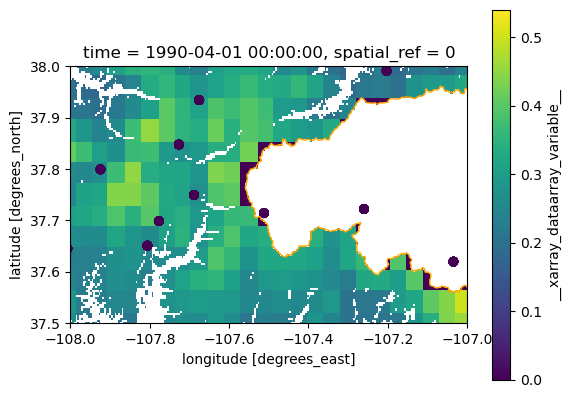

In [284]:
fig, ax = plt.subplots()

prism_precip[0].plot(ax=ax)
df_stations.plot(ax=ax, column='reanalysis_cluster')
#df_stations[df_stations.index.get_level_values(0)==site1].plot(ax=ax, color='k')
#df_stations[df_stations.index.get_level_values(0)==site2].plot(ax=ax, column= 'reanalysis_cluster', edgecolor='red')
#df_stations[df_stations.index.get_level_values(0)=='632_CO_SNTL'].plot(ax=ax, edgecolor='blue')
#df_stations[df_stations.index.get_level_values(0)=='629_CO_SNTL'].plot(ax=ax, edgecolor='green')
ucrb.plot(facecolor='none',edgecolor='orange', ax=ax)
#629, #632
ax.set_xlim(-108, -107)
ax.set_ylim(37.5, 38)

(37.5, 38.0)

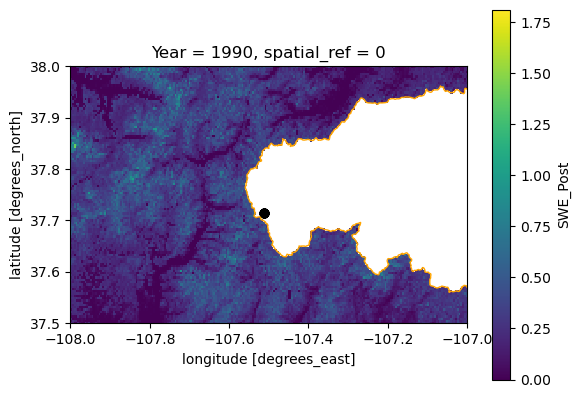

In [251]:
fig, ax = plt.subplots()
swe.SWE_Post[0].plot(ax=ax)
df_stations[df_stations.index.get_level_values(0)==site1].plot(ax=ax, color='k')
ucrb.plot(ax=ax, facecolor='none', edgecolor='orange')
ax.set_xlim(-108, -107)
ax.set_ylim(37.5, 38)

In [338]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(pd.melt(df_molas_pred, id_vars=['molas_swe'], value_vars=['spud_swe', 'molas_pred_snv',
       'molas_pred_quantile', 'molas_pred_precip'])).mark_circle().encode(
        x = alt.X('molas_swe').title('molas SNOTEL SWE (m)'), 
        y = alt.Y('value').title('Predicted SWE (m) at molas'),
        color=alt.Color('variable')
    ).properties(title='Predicted SWE at molas')

combined = (station_predict + line2) 
combined

alt.LayerChart(...)

#### Preprocess the metrics data for plotting:

In [381]:
metrics_df['plot_x'] = [0.8, 0.8, 0.8, 0.8, 0.8, 1, 1, 1, 1, 1, 1.2, 1.2, 1.2, 1.2, 1.2]
metrics_df['plot_y'] = [0.1, 0.2, 0.3, 0.4, 0.5,0.1, 0.2, 0.3, 0.4, 0.5,0.1, 0.2, 0.3, 0.4, 0.5]

In [382]:
metrics_reset = metrics_df.reset_index()
metrics_reset.columns = metrics_reset.columns.get_level_values(0)

In [383]:
metrics_reset['R']= metrics_reset['R'].astype('float32')
metrics_reset['MD']= metrics_reset['MD'].astype('float32')
metrics_reset['RMSE']= metrics_reset['RMSE'].astype('float32')

In [384]:
metrics_reset = metrics_reset.round(decimals=2)

In [385]:
metrics_reset['R'] = metrics_reset['R'].astype('str')
metrics_reset['MD'] = metrics_reset['MD'].astype('str')
metrics_reset['RMSE'] = metrics_reset['RMSE'].astype('str')

In [387]:
metrics_reset = metrics_reset[metrics_reset['method'] != 'Natural Log SNV']

In [392]:
metrics_reset['plot_x'] = [0.8, 0.8, 0.8, 0.8, 1, 1, 1, 1, 1.2, 1.2, 1.2, 1.2]
metrics_reset['plot_y'] = [0.1, 0.2, 0.3, 0.4,0.1, 0.2, 0.3, 0.4,0.1, 0.2, 0.3, 0.4]

/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_794/1553167997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_reset['plot_x'] = [0.8, 0.8, 0.8, 0.8, 1, 1, 1, 1, 1.2, 1.2, 1.2, 1.2]
/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_794/1553167997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_reset['plot_y'] = [0.1, 0.2, 0.3, 0.4,0.1, 0.2, 0.3, 0.4,0.1, 0.2, 0.3, 0.4]


In [393]:
metrics_reset

station             method      R     MD  RMSE  plot_x  plot_y
0        Butte        SWE Mapping   0.92  -0.48   0.5     0.8     0.1
1        Butte        SNV Mapping   0.92  -0.07  0.09     0.8     0.2
3        Butte   Quantile Mapping   0.89    0.0  0.05     0.8     0.3
4        Butte  Cumulative Precip   0.12    0.1  0.16     0.8     0.4
5     Dry Lake        SWE Mapping   0.93  -0.08   0.1     1.0     0.1
6     Dry Lake        SNV Mapping   0.93   0.08  0.11     1.0     0.2
8     Dry Lake   Quantile Mapping   0.92   -0.0  0.05     1.0     0.3
9     Dry Lake  Cumulative Precip  -0.24   0.13  0.22     1.0     0.4
10  Molas Lake        SWE Mapping   0.91  -0.12  0.16     1.2     0.1
11  Molas Lake        SNV Mapping    0.9   0.13  0.14     1.2     0.2
13  Molas Lake   Quantile Mapping   0.89   -0.0  0.07     1.2     0.3
14  Molas Lake  Cumulative Precip  -0.05   0.15  0.23     1.2     0.4

In [361]:
df_butte_pred_try.columns

Index(['butte_swe', 'schofield_swe R:0.9168102917716949', 'butte_pred_snv',
       'butte_pred_snv_log', 'butte_pred_quantile', 'butte_pred_precip',
       'difference_swe', 'difference_snv', 'difference_snv_log',
       'difference_quantile', 'difference_precip'],
      dtype='object')

In [353]:
metrics_df[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='SWE Mapping')]['R'].values[0][0]

0.9168102917716949

In [359]:
r = metrics_df[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='SWE Mapping')]['R'].values[0][0]
df_butte_pred_try = df_butte_pred.rename(columns={'schofield_swe': f'schofield_swe R:{r}'})

In [416]:
df_butte_pred.columns

Index(['butte_swe', 'schofield_swe', 'butte_pred_snv', 'butte_pred_snv_log',
       'butte_pred_quantile', 'butte_pred_precip', 'difference_swe',
       'difference_snv', 'difference_snv_log', 'difference_quantile',
       'difference_precip'],
      dtype='object')

In [421]:
df_butte_pred_rename = df_butte_pred.rename(columns={'butte_swe':'true_swe', 'schofield_swe':'swe_mapping','butte_pred_snv':'snv_mapping', 'butte_pred_quantile':'quantile_mapping', 'butte_pred_precip':'cumulative_precip'})

df_drylake_pred_rename = df_drylake_pred.rename(columns={'drylake_swe':'true_swe', 'columbine_swe':'swe_mapping','drylake_pred_snv':'snv_mapping', 'drylake_pred_quantile':'quantile_mapping', 'drylake_pred_precip':'cumulative_precip'})

df_molas_pred_rename = df_molas_pred.rename(columns={'molas_swe':'true_swe', 'spud_swe':'swe_mapping','molas_pred_snv':'snv_mapping', 'molas_pred_quantile':'quantile_mapping', 'molas_pred_precip':'cumulative_precip'})

In [529]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

butte_predict = alt.Chart(pd.melt(df_butte_pred_rename, id_vars=['true_swe'], value_vars=['swe_mapping', 'snv_mapping',
       'quantile_mapping', 'cumulative_precip'])).mark_circle().encode(
        x = alt.X('true_swe').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('value',scale=alt.Scale(domain=[0, 1.25])).title('Predicted SWE (m) at Butte'),
        color=alt.Color('variable')
    ).properties(title='Predicted SWE at Butte')

drylake_predict = alt.Chart(pd.melt(df_drylake_pred_rename, id_vars=['true_swe'], value_vars=['swe_mapping', 'snv_mapping',
       'quantile_mapping', 'cumulative_precip'])).mark_circle().encode(
        x = alt.X('true_swe').title('Dry Lake SNOTEL SWE (m)'), 
        y = alt.Y('value',scale=alt.Scale(domain=[0, 1.25])).title('Predicted SWE (m) at Dry Lake'),
        color=alt.Color('variable')
    ).properties(title='Predicted SWE at Dry Lake')

molas_predict = alt.Chart(pd.melt(df_molas_pred_rename, id_vars=['true_swe'], value_vars=['swe_mapping', 'snv_mapping',
       'quantile_mapping', 'cumulative_precip'])).mark_circle().encode(
        x = alt.X('true_swe').title('Molas SNOTEL SWE (m)'), 
        y = alt.Y('value',scale=alt.Scale(domain=[0, 1.25])).title('Predicted SWE (m) at Molas'),
        color=alt.Color('variable')
    ).properties(title='Predicted SWE at Molas Lake')

# metrics_reset = metrics_df.reset_index()
# metrics_reset.columns = metrics_reset.columns.get_level_values(0)
# metrics_reset = metrics_reset.round(decimals=2)
# metrics_reset['R'] = metrics_reset['R'].astype('str')

annotation1 = (alt.Chart(metrics_reset[metrics_reset.index.get_level_values(0)=='Butte'])
             .mark_text(size=20, dx=-10, dy=0, align='left')
             .encode(x='plot_x:Q', y='plot_y:Q', text=str('R')))

annotation2 = (alt.Chart(metrics_reset[metrics_reset.index.get_level_values(0)=='Dry Lake'])
             .mark_text(size=20, dx=-10, dy=0, align='left')
             .encode(x='plot_x:Q', y='plot_y:Q', text=str('R')))

annotation3 = (alt.Chart(metrics_reset[metrics_reset.index.get_level_values(0)=='Molas Lake'])
             .mark_text(size=20, dx=-10, dy=0, align='left')
             .encode(x='plot_x:Q', y='plot_y:Q', text=str('R')))

combined = alt.hconcat(butte_predict + line2 + annotation1, drylake_predict + line2 + annotation2) #, molas_predict + line2 + annotation3 
combined

alt.HConcatChart(...)

In [434]:
metrics_df['R'] = metrics_df['R'].astype('float32')
metrics_df['MD'] = metrics_df['MD'].astype('float32')
metrics_df['RMSE'] = metrics_df['RMSE'].astype('float32')

metrics_df_round = np.round(metrics_df, decimals=2)

In [435]:
metrics_df_round

R    MD  RMSE plot_x plot_y
station    method                                           
Butte      SWE Mapping        0.92 -0.48  0.50    0.8    0.1
           SNV Mapping        0.92 -0.07  0.09    0.8    0.2
           Natural Log SNV    0.92 -0.07  0.09    0.8    0.3
           Quantile Mapping   0.89  0.00  0.05    0.8    0.4
           Cumulative Precip  0.12  0.10  0.16    0.8    0.5
Dry Lake   SWE Mapping        0.93 -0.08  0.10    1.0    0.1
           SNV Mapping        0.93  0.08  0.11    1.0    0.2
           Natural Log SNV     NaN  0.02  0.02    1.0    0.3
           Quantile Mapping   0.92 -0.00  0.05    1.0    0.4
           Cumulative Precip -0.24  0.13  0.22    1.0    0.5
Molas Lake SWE Mapping        0.91 -0.12  0.16    1.2    0.1
           SNV Mapping        0.90  0.13  0.14    1.2    0.2
           Natural Log SNV    0.90  0.12  0.15    1.2    0.3
           Quantile Mapping   0.89 -0.00  0.07    1.2    0.4
           Cumulative Precip -0.05  0.15  0.23    1.2    0.5

### Make a plot to illustrate the Quantile Mapping at Butte and Schofield Pass:

In [455]:
site1 = '380_CO_SNTL' # Butte station
site2 = '737_CO_SNTL' # Schofield Pass station

quantiles = np.linspace(0,1,100)

year = 2020
schofield_q = df_stations.loc[(df_stations.index.get_level_values(0)==site2) & (df_stations.index.get_level_values(1)==year)]['quantile_q8'].values[0]
schofield_swe = df_stations.loc[(df_stations.index.get_level_values(0)==site2) & (df_stations.index.get_level_values(1)==year)]['station_swe'].values[0]
butte_cdf = np.quantile(df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1)]['station_swe'], quantiles, method='median_unbiased')
schofield_cdf = np.quantile(df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site2)]['station_swe'], quantiles, method='median_unbiased')
butte_quantile_1990 = np.interp(schofield_q, quantiles, np.sort(cdf))

In [454]:
[schofield_swe, schofield_q]

[station      year
 737_CO_SNTL  2020    0.74676
 Name: station_swe, dtype: float64,
 station      year
 737_CO_SNTL  2020    0.515152
 Name: quantile_q8, dtype: float64]

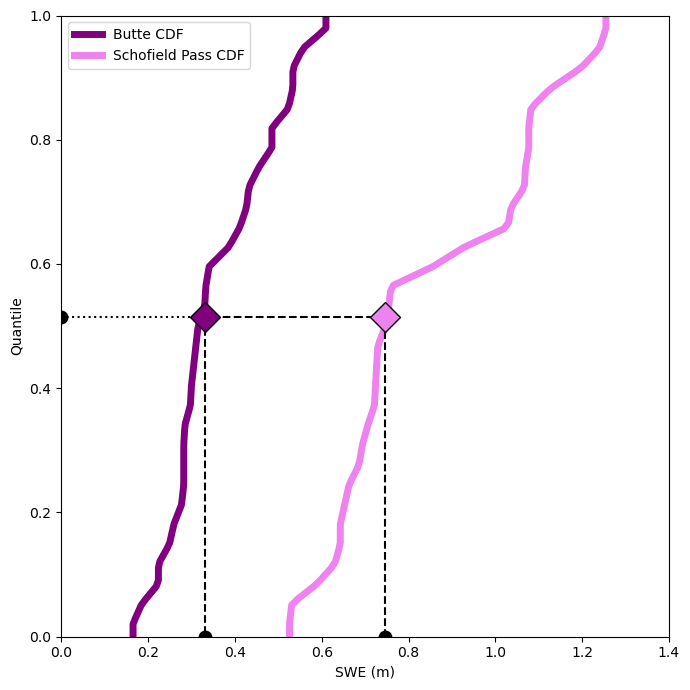

In [532]:
quantiles = np.linspace(0,1,100)


plt.figure(figsize=(7,7))

plt.plot(butte_cdf, quantiles, label = 'Butte CDF', color='purple', linewidth=5)
plt.plot(schofield_cdf, quantiles, label = 'Schofield Pass CDF', color='violet', linewidth=5)

# Plot a line from the x-axis to the Schofield Pass test point
plt.plot([schofield_swe, schofield_swe], [0, schofield_q], c='k', linestyle='--')
# Plot a line from the test point to the y-axis
plt.plot([schofield_swe, butte_quantile_1990], [schofield_q, schofield_q], c='k', linestyle='--')
# Plot a line from the test point to the y-axis
plt.plot([0, butte_quantile_1990], [schofield_q, schofield_q], c='k', linestyle=':')
# Plot a line from the Butte test point to the x-axis
plt.plot([butte_quantile_1990, butte_quantile_1990], [schofield_q, 0], c='k', linestyle='--')

# Plot a marker at the location of the 'current-year' quantile on the Schofield CDF
plt.plot(schofield_swe, schofield_q, 'D', markerfacecolor='violet', markeredgecolor='k',markersize=15)
# Plot a marker at the location of the 'current-year' quantile on the Butte CDF
plt.plot(butte_quantile_1990, schofield_q, 'D', markerfacecolor='purple', markeredgecolor='k',markersize=15)

# Plot a marker on the x-axis that corresponds to the Schofield Pass SWE at the 'current-year' quantile
plt.plot(schofield_swe, 0, 'o', markerfacecolor='k', markeredgecolor='none',markersize=10)
# Plot a marker on the x-axis that corresponds to the Butte SWE at the 'current-year' Schofield Pass quantile
plt.plot(butte_quantile_1990, 0, 'o', markerfacecolor='k', markeredgecolor='none',markersize=10)
# Plot a marker on the y-axis that corresponds to the 'current-year' Schofield Pass quantile
plt.plot(0, schofield_q, 'o', markerfacecolor='k', markeredgecolor='none',markersize=10)

plt.legend()
plt.xlabel('SWE (m)')
plt.ylabel('Quantile')
plt.ylim(0,1)
plt.xlim(0,1.4)

plt.tight_layout()
plt.savefig('../figures/quantile_example.jpeg', dpi=300)

#### Notes from Ross:  
* make cdf lines thicker?
* Make diamonds bigger?
* Make colors more distinct?
* only use 2 different color bars for spatial plot
* Choose 2 station pairs to highlight, remove MD or RMSE to simplify? and include those metrics on the plots.

In [518]:
schofield_q

0.5151515151515152

In [527]:
butte_quantile_1990

0.3314058585858586

In [528]:
schofield_swe

0.74676

In [ ]:
# roygbiv: red, orange, yellow, green, blue, indigo, violet

In [ ]:
plt.figure(figsize=(10,10))

# We can also create these by picking arbitrary quantile values, then using the scipy.stats.mstats.mquantiles function
quantiles = np.linspace(0,1,100) # 100 quantile values linearly spaced between 0 and 1
plt.plot(stats.mstats.mquantiles(data['BLC_max'], quantiles), quantiles, 
         'b.', label='Blue Canyon Quantile Plot from interpolated probabilities', alpha=0.7)
plt.plot(stats.mstats.mquantiles(data['SLI_max'], quantiles), quantiles, 
         'r.', label='Slide Canyon Quantile Plot from interpolated probabilities', alpha=0.7)

# Plot the Slide Canyon test point value
plt.plot(SLI_test,SLI_test_quantile,'D', markerfacecolor='m', markeredgecolor='k',markersize=10, label='SLI_test ({},{})'.format(SLI_test, np.round(SLI_test_quantile,2)))
# Plot a line from the x-axis to the test point
plt.plot([SLI_test, SLI_test], [0, SLI_test_quantile], c='m', linestyle='-')
# Plot a line from the test point to the y-axis
plt.plot([0, SLI_test], [SLI_test_quantile, SLI_test_quantile], c='k', linestyle='-')

# Plot the Blue Canyon test point value
plt.plot(BLC_test,SLI_test_quantile,'D', markerfacecolor='c', markeredgecolor='k',markersize=10, label='BLC_test ({},{})'.format(BLC_test, np.round(SLI_test_quantile,2)))
# Plot a line from the test point to the x-axis
plt.plot([BLC_test, BLC_test], [0, SLI_test_quantile], c='c', linestyle='-')

plt.ylabel('Quantile')
plt.xlabel('Peak SWE (mm)')
plt.xlim((0,2500))
plt.ylim((0,1))
plt.title('Quantiles of SWE data')
plt.legend(loc="best");

In [426]:
metrics_df_reindex = metrics_df.reset_index()

In [429]:
metrics_df_reindex.columns

MultiIndex([('level_0',),
            ('level_1',),
            (      'R',),
            (     'MD',),
            (   'RMSE',)],
           )

In [432]:
metrics_df2 = metrics_df.copy()

In [433]:
metrics_df2.columns = metrics_df.columns.map(''.join)

In [435]:
metrics_df2 = metrics_df2.reset_index()

In [436]:
metrics_df2

level_0            level_1         R        MD      RMSE
0      Butte  Untransformed SNV   0.91681 -0.070615  0.090286
1      Butte    Natural Log SNV  0.917291 -0.072598  0.096985
2      Butte   Quantile Mapping   0.91272 -0.000645  0.047611
3   Dry Lake  Untransformed SNV  0.933018  0.077926  0.113895
4   Dry Lake    Natural Log SNV  0.905509  0.053282  0.137679
5   Dry Lake   Quantile Mapping  0.950113 -0.000154  0.042134
6  Bear Town  Untransformed SNV  0.856585  0.013424  0.092209
7  Bear Town    Natural Log SNV   0.86083  0.012509  0.090655
8  Bear Town   Quantile Mapping   0.86931 -0.002338    0.0902

In [424]:
r_plot = alt.Chart(metrics_reset).mark_bar().encode(
    x='method:O',
    y='R:Q',
    color='method:N',
    column='station:N'
).properties(title='')

md_plot = alt.Chart(metrics_reset).mark_bar().encode(
    x='method:O',
    y='MD:Q',
    color='method:N',
    column='station:N'
).properties(title='')

rmse_plot = alt.Chart(metrics_reset).mark_bar().encode(
    x='method:O',
    y='RMSE:Q',
    color='method:N',
    column='station:N'
).properties(title='')

concat = alt.hconcat(r_plot, md_plot, rmse_plot)
concat

alt.HConcatChart(...)

In [398]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_butte_pred[['butte_swe', 'butte_pred_snv']]).mark_circle().encode(
        x = alt.X('butte_swe').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('butte_pred_snv').title('Predicted SWE (m) at Butte')
    ).properties(title='Predicted SWE at Butte')

station_predict + line2

alt.LayerChart(...)

In [402]:
np.corrcoef(df_butte_pred['butte_swe'], df_butte_pred['butte_pred_snv'])[0,1]

0.9176148722359921

In [403]:
np.corrcoef(df_butte_pred['butte_swe'], df_butte_pred['butte_pred_quantile'])[0,1]

0.8914031344748805

In [411]:
site1 = '380_CO_SNTL' # Butte station
site2 = '737_CO_SNTL' # Schofield Pass station

In [412]:
quantiles = np.linspace(0,1,100)

quantiles_all_years = []

for year in np.arange(1990, 2022):
    q = df_stations.loc[(df_stations.index.get_level_values(0)==site2) & (df_stations.index.get_level_values(1)==year)]['quantile_q8']
    cdf = np.quantile(df_stations.loc[df_stations.index.get_level_values(0) == site1]['station_swe'], quantiles, method='median_unbiased')
    quantiles_all_years.append(np.interp(q, quantiles, np.sort(cdf))[0])

In [413]:
quantiles_all_years

[0.28193999999999997,
 0.3399921960867415,
 0.25791690235690234,
 0.5164970389250765,
 0.3329735632183908,
 0.532616049382716,
 0.43538325143325135,
 0.4530676639409974,
 0.2998607143600958,
 0.22662560904783735,
 0.30934172185430453,
 0.3300460606060607,
 0.28514251394251394,
 0.3048,
 0.2820972768333744,
 0.48514,
 0.3845432352560619,
 0.2972161602603213,
 0.5577248748695534,
 0.48514,
 0.3479407032348804,
 0.41397134099616856,
 0.1651,
 0.2219213986013986,
 0.425149553095531,
 0.18485304194843039,
 0.25791690235690234,
 0.6095999999999999,
 0.27585489742788716,
 0.5344952922474029,
 0.3300460606060607,
 0.281378348649795]

In [414]:
np.corrcoef(df_butte_pred['butte_swe'], quantiles_all_years)[0,1]

0.9130814186363468

In [399]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_butte_pred[['butte_swe', 'butte_pred_quantile']]).mark_circle().encode(
        x = alt.X('butte_swe').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('butte_pred_quantile').title('Predicted SWE (m) at Butte')
    ).properties(title='Predicted SWE at Butte')

station_predict + line2

alt.LayerChart(...)

### Attempt to add metrics annotations to the plots:

In [137]:
metrics_df[metrics_df.index.get_level_values(0)=='Butte']['R'].values[0][0]

0.9168102917716949

In [ ]:
annotation_layer = (
    alt.Chart(annotations_df)
    .mark_text(size=20, dx=-10, dy=0, align="left")
    .encode(x="date:T", y=alt.Y("price:Q"), text="marker", tooltip="description")
)

In [149]:
metrics_df[metrics_df.index.get_level_values(0)=='Butte'][['R', 'plot_x', 'plot_y']]

R plot_x plot_y
station method                                   
Butte   SWE Mapping         0.91681    0.2    0.1
        SNV Mapping        0.917615    0.2    0.2
        Natural Log SNV    0.918852    0.2    0.3
        Quantile Mapping   0.891403    0.2    0.4
        Cumulative Precip  0.122122    0.2    0.5

In [165]:
type(metrics_reset['R'])

pandas.core.frame.DataFrame

In [192]:
metrics_reset = metrics_df[metrics_df.index.get_level_values(0)=='Butte'].reset_index()
metrics_reset.columns = metrics_reset.columns.get_level_values(0)
#metrics_reset.round(decimals=2)

In [195]:
metrics_reset['R']= metrics_reset['R'].astype('float32')

In [196]:
metrics_reset.round(decimals=2)

station             method     R        MD      RMSE  plot_x  plot_y
0   Butte        SWE Mapping  0.92 -0.483949  0.498655     0.2     0.1
1   Butte        SNV Mapping  0.92 -0.070054  0.088366     0.2     0.2
2   Butte    Natural Log SNV  0.92 -0.071472  0.094005     0.2     0.3
3   Butte   Quantile Mapping  0.89   0.00141  0.052364     0.2     0.4
4   Butte  Cumulative Precip  0.12  0.100135  0.158091     0.2     0.5

In [183]:
metrics_reset = metrics_df.reset_index()
metrics_reset.columns = metrics_reset.columns.get_level_values(0)
metrics_reset.round(decimals=2)
metrics_reset['R'] = metrics_reset['R'].astype('str')

In [184]:
metrics_reset.columns

Index(['station', 'method', 'R', 'MD', 'RMSE', 'plot_x', 'plot_y'], dtype='object')

In [185]:
metrics_reset

station             method                    R        MD      RMSE  \
0       Butte        SWE Mapping   0.9168102917716949 -0.483949  0.498655   
1       Butte        SNV Mapping   0.9176148722359921 -0.070054  0.088366   
2       Butte    Natural Log SNV   0.9188515578481352 -0.071472  0.094005   
3       Butte   Quantile Mapping   0.8914031344748805   0.00141  0.052364   
4       Butte  Cumulative Precip  0.12212175037045232  0.100135  0.158091   
5    Dry Lake        SWE Mapping                  nan       NaN       NaN   
6    Dry Lake        SNV Mapping                  nan       NaN       NaN   
7    Dry Lake    Natural Log SNV                  nan       NaN       NaN   
8    Dry Lake   Quantile Mapping                  nan       NaN       NaN   
9    Dry Lake  Cumulative Precip                  nan       NaN       NaN   
10  Bear Town        SWE Mapping                  nan       NaN       NaN   
11  Bear Town        SNV Mapping                  nan       NaN       NaN   
12  Bear Town    Natural Log SNV                  nan       NaN       NaN   
13  Bear Town   Quantile Mapping                  nan       NaN       NaN   
14  Bear Town  Cumulative Precip                  nan       NaN       NaN   

    plot_x  plot_y  
0      0.2     0.1  
1      0.2     0.2  
2      0.2     0.3  
3      0.2     0.4  
4      0.2     0.5  
5      0.2     0.1  
6      0.2     0.2  
7      0.2     0.3  
8      0.2     0.4  
9      0.2     0.5  
10     0.2     0.1  
11     0.2     0.2  
12     0.2     0.3  
13     0.2     0.4  
14     0.2     0.5

### Predict SWE using log values:

In [48]:
site2 = '737_CO_SNTL'
site1 = '380_CO_SNTL'

In [105]:
swe_pred_log = (df_stations.loc[pd.IndexSlice[site2],'log_station_n'] * df_stations.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].std()) + df_stations.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].mean()

In [316]:
#df_swe_pred_log = pd.DataFrame(swe_real)

In [106]:
df_butte_pred['Butte_pred_log'] = swe_pred_log

In [109]:
df_butte_pred['Butte_pred_log_trans'] = math.e**df_butte_pred['Butte_pred_log']

In [113]:
df_butte_pred['difference_log'] = df_butte_pred['station_swe'] - df_butte_pred['Butte_pred_log_trans']

In [114]:
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'MD'] = df_butte_pred['difference'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'RMSE'] = np.sqrt((df_butte_pred['difference']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'R'] = np.corrcoef(df_butte_pred['station_swe'], df_butte_pred['Butte_pred_log_trans'])[0,1]

In [115]:
metrics_df

R        MD      RMSE
station   method                                         
Butte     Untransformed SNV  0.999263 -0.070299  0.073371
          Natural Log SNV    0.917291 -0.070299  0.073371
          Quantile Mapping        NaN       NaN       NaN
Dry Lake  Untransformed SNV       NaN       NaN       NaN
          Natural Log SNV         NaN       NaN       NaN
          Quantile Mapping        NaN       NaN       NaN
Bear Town Untransformed SNV       NaN       NaN       NaN
          Natural Log SNV         NaN       NaN       NaN
          Quantile Mapping        NaN       NaN       NaN

In [233]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred_log_trans').title('Butte SNOTEL SWE predicted with Schofield Pass Ln(SNVs) (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

combined = (station_predict + line2) # + annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

### Predict SWE with Quantile Mapping:

In [321]:
# This function should be able to accept any one-dimensional numpy array or list, of numbers
# It returns two numpy arrays, one of the sorted numbers, the other of the plotting position
def cunnane_quantile_array(numbers):
    '''This function also computes the Cunnane plotting position given an array or list of numbers (rather than a pandas dataframe).
    It has two outputs, first the sorted numbers, second the Cunnane plotting position for each of those numbers.
    [Steven Pestana, spestana@uw.edu, Oct. 2020]'''
    
    # 1) sort the data, using the numpy sort function (np.sort())
    sorted_numbers = np.sort(numbers)
    
    # length of the list of numbers
    n = len(sorted_numbers) 
    
    # make an empty array, of the same length. below we will add the plotting position values to this array
    cunnane_plotting_position = np.empty(n)
    
    # 2) compute the Cunnane plotting position for each number, using a for loop and the enumerate function
    for rank, number in enumerate(sorted_numbers):
        cunnane_plotting_position[rank] = ( (rank+1) - (2/5) ) / ( n + (1/5) )
    
    return sorted_numbers, cunnane_plotting_position

In [322]:
site2 = '737_CO_SNTL'
site1 = '380_CO_SNTL'

In [323]:
data = {'Butte':df.loc[pd.IndexSlice[site1],'station_swe'].values, 'Schofield':df.loc[pd.IndexSlice[site2],'station_swe'].values}

In [324]:
df_quantiles = pd.DataFrame(data)

In [118]:
df_butte_pred.index == 1990

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [121]:
year = 1990
q = 0.5
quantiles = np.linspace(0,1,100)
cdf = np.quantile(df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1)]['station_swe'], quantiles, method='median_unbiased')

In [130]:
quantiles

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [129]:
np.sort(cdf)

array([0.1651    , 0.1651    , 0.1651    , 0.18162283, 0.20011266,
       0.21860249, 0.22352   , 0.22352   , 0.22352   , 0.22813818,
       0.23617724, 0.2442163 , 0.25025414, 0.25346976, 0.25668539,
       0.26051677, 0.26614411, 0.27177145, 0.27701394, 0.27862175,
       0.28022956, 0.28183737, 0.28194   , 0.28194   , 0.28194   ,
       0.28194   , 0.28194   , 0.28194   , 0.28243603, 0.28323993,
       0.28404384, 0.28631872, 0.29033825, 0.29435778, 0.29741946,
       0.29822337, 0.29902727, 0.29994236, 0.30155017, 0.30315798,
       0.30476579, 0.3063736 , 0.30798141, 0.30958923, 0.31119704,
       0.31280485, 0.31441266, 0.31814141, 0.32296485, 0.32778828,
       0.33060195, 0.33140586, 0.33220976, 0.33356101, 0.33597273,
       0.33838444, 0.34065077, 0.34225859, 0.3438664 , 0.34571367,
       0.35857616, 0.37143865, 0.38430114, 0.39300727, 0.40104633,
       0.40908539, 0.41486667, 0.4196901 , 0.42451354, 0.42759232,
       0.42920013, 0.43080795, 0.43457091, 0.44180606, 0.44904

In [133]:
np.sort(df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1)]['station_swe'])

array([0.1651 , 0.22352, 0.22352, 0.24892, 0.25908, 0.27686, 0.28194,
       0.28194, 0.28194, 0.28448, 0.29718, 0.29972, 0.3048 , 0.30988,
       0.31496, 0.3302 , 0.33274, 0.34036, 0.34544, 0.38608, 0.41148,
       0.42672, 0.4318 , 0.45466, 0.48514, 0.48514, 0.52324, 0.5334 ,
       0.5334 , 0.55626, 0.6096 ])

In [134]:
np.interp(0.5, quantiles, np.sort(cdf))

0.32919511784511785

In [138]:
df_butte_pred.columns

Index(['station_swe', 'Butte_pred_snv', 'difference', 'Butte_pred_log',
       'Butte_pred_log_trans', 'difference_log'],
      dtype='object')

In [142]:
df_butte_pred['butte_pred_quantile'] = np.nan
df_butte_pred.loc[(df_butte_pred.index == year),'butte_pred_quantile'] = 8

In [146]:
df_butte_pred['butte_pred_quantile'] = np.nan

quantiles = np.linspace(0,1,100)

for year in np.arange(1990, 2022):
    q = df_stations.loc[(df_stations.index.get_level_values(0)==site2) & (df_stations.index.get_level_values(1)==year)]['quantile_q8']
    cdf = np.quantile(df_stations.loc[(df_stations.index.get_level_values(1) != year) & (df_stations.index.get_level_values(0) == site1)]['station_swe'], quantiles, method='median_unbiased')
    df_butte_pred.loc[(df_butte_pred.index == year),'butte_pred_quantile'] = np.interp(q, quantiles, np.sort(cdf))

In [147]:
df_butte_pred

station_swe  Butte_pred_snv  difference  Butte_pred_log  \
year                                                            
1990      0.18542        0.221561   -0.036141       -1.137916   
1991      0.31496        0.380317   -0.065357       -0.999204   
1992      0.29718        0.353277   -0.056097       -1.226337   
1993      0.60960        0.737768   -0.128168       -0.517898   
1994      0.29972        0.361593   -0.061873       -1.008329   
1995      0.52324        0.621635   -0.098395       -0.461630   
1996      0.53340        0.630372   -0.096972       -0.537184   
1997      0.48514        0.583515   -0.098375       -0.533951   
1998      0.30988        0.366883   -0.057003       -1.064404   
1999      0.25908        0.313720   -0.054640       -1.253476   
2000      0.33020        0.395760   -0.065560       -1.054896   
2001      0.27686        0.330834   -0.053974       -1.022133   
2002      0.24892        0.304110   -0.055190       -1.098216   
2003      0.34036        0.409390   -0.069030       -1.059642   
2004      0.28448        0.343236   -0.058756       -1.122892   
2005      0.45466        0.531339   -0.076679       -0.524297   
2006      0.38608        0.461436   -0.075356       -0.724299   
2007      0.28194        0.339288   -0.057348       -1.069183   
2008      0.55626        0.671335   -0.115075       -0.333156   
2009      0.42672        0.506685   -0.079965       -0.524297   
2010      0.30480        0.362652   -0.057852       -0.836538   
2011      0.43180        0.512335   -0.080535       -0.586631   
2012      0.16510        0.201502   -0.036402       -1.499176   
2013      0.22352        0.272092   -0.048572       -1.344152   
2014      0.41148        0.486041   -0.074561       -0.576597   
2015      0.28194        0.340729   -0.058789       -1.486102   
2016      0.33274        0.396649   -0.063909       -1.226337   
2017      0.53340        0.632983   -0.099583       -0.316542   
2018      0.22352        0.271099   -0.047579       -1.205009   
2019      0.48514        0.568337   -0.083197       -0.381366   
2020      0.34544        0.414238   -0.068798       -1.022133   
2021      0.28194        0.351789   -0.069849       -1.184010   

      Butte_pred_log_trans  difference_log  butte_pred_quantile  
year                                                             
1990              0.320486       -0.135066             0.281940  
1991              0.368172       -0.053212             0.342274  
1992              0.293365        0.003815             0.256172  
1993              0.595771        0.013829             0.487070  
1994              0.364828       -0.065108             0.336293  
1995              0.630256       -0.107016             0.531464  
1996              0.584391       -0.050991             0.428802  
1997              0.586284       -0.101144             0.435369  
1998              0.344933       -0.035053             0.298725  
1999              0.285511       -0.026431             0.225135  
2000              0.348228       -0.018028             0.307054  
2001              0.359827       -0.082967             0.331406  
2002              0.333465       -0.084545             0.292821  
2003              0.346580       -0.006220             0.302653  
2004              0.325337       -0.040857             0.281940  
2005              0.591972       -0.137312             0.485140  
2006              0.484664       -0.098584             0.368110  
2007              0.343289       -0.061349             0.298979  
2008              0.716658       -0.160398             0.539564  
2009              0.591972       -0.165252             0.485140  
2010              0.433208       -0.128408             0.361995  
2011              0.556198       -0.124398             0.398720  
2012              0.223314       -0.058214             0.185420  
2013              0.260761       -0.037241             0.220545  
2014              0.561807       -0.150327             0.427824  
2015         

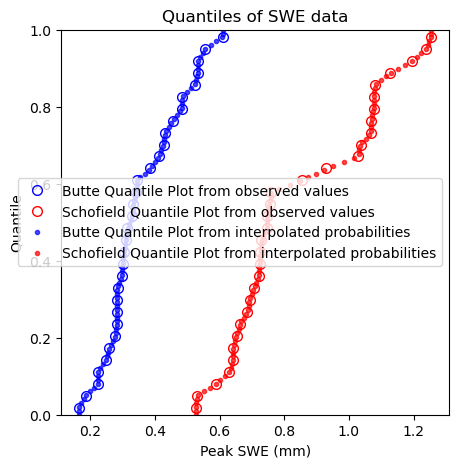

In [325]:
plt.figure(figsize=(5,5))

# Here we use the actual values from the dataset to create the plots
Butte_ordered, Butte_quantile = cunnane_quantile_array(df_quantiles['Butte'])
Schofield_ordered, Schofield_quantile = cunnane_quantile_array(data['Schofield'])
plt.plot(Butte_ordered, Butte_quantile, 'o', markeredgecolor='b', markerfacecolor='None', markersize=7, label='Butte Quantile Plot from observed values')
plt.plot(Schofield_ordered, Schofield_quantile, 'o', markeredgecolor='r', markerfacecolor='None', markersize=7, label='Schofield Quantile Plot from observed values')


# We can also create these by picking arbitrary quantile values, then using the scipy.stats.mstats.mquantiles function
quantiles = np.linspace(0,1,100) # 100 quantile values linearly spaced between 0 and 1
plt.plot(stats.mstats.mquantiles(df_quantiles['Butte'], quantiles), quantiles, 
         'b.', label='Butte Quantile Plot from interpolated probabilities', alpha=0.7)
plt.plot(stats.mstats.mquantiles(data['Schofield'], quantiles), quantiles, 
         'r.', label='Schofield Quantile Plot from interpolated probabilities', alpha=0.7)

plt.ylabel('Quantile')
plt.xlabel('Peak SWE (mm)')
#plt.xlim((0,2500))
plt.ylim((0,1))
plt.title('Quantiles of SWE data')
plt.legend(loc="best");

In [326]:
quantiles = np.linspace(0,1,100)

# This is our empirical cdf of the Slide Canyon data, which also includes values down to 0 and up to 1.
Schofield_ordered = stats.mstats.mquantiles(data['Schofield'], quantiles)

# This is our empirical cdf of the Blue Canyon data, which also includes values down to 0 and up to 1.
Butte_ordered = stats.mstats.mquantiles(data['Butte'], quantiles)

In [327]:
# Create our interpolation function for looking up a quantile given a value of SWE at Slide Canyon
f_Schofield = interp1d(Schofield_ordered, quantiles)
# Create our interpolation function for looking up SWE at Blue Canyon given a quantile
g_Butte = interp1d(quantiles, Butte_ordered)

# Now, we can create a prediction for every value in the Slide Canyon dataset to come up with a matching prediction for the Blue Canyon dataset
Butte_predicted=g_Butte( f_Schofield( data['Schofield'] ) )

In [328]:
df_quantiles['Butte_predicted'] = Butte_predicted

In [329]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_quantiles).mark_circle().encode(
        x = alt.X('Butte').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('Butte_predicted').title('Butte SNOTEL SWE predicted with Schofield Pass SWE Quantiles (m)') 
    ).properties(title='Predicted SWE from Quantile SWE')

combined = (station_predict + line2 ) 
combined

alt.LayerChart(...)

In [126]:
print('R value: ', np.corrcoef(df_quantiles['Butte'], df_quantiles['Butte_predicted'])[0,1])

R value:  0.9127201200081577


In [331]:
df_quantiles['difference'] = df_quantiles['Butte'] - df_quantiles['Butte_predicted']
df_quantiles['difference'].mean()

-0.0006449148055644727

In [332]:
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'MD'] = df_quantiles['difference'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'RMSE'] = np.sqrt((df_quantiles['difference']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Butte') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'R'] = np.corrcoef(df_quantiles['Butte'], df_quantiles['Butte_predicted'])[0,1]

In [129]:
np.sqrt((df_quantiles['difference']**2).mean())

0.04761143567514156

In [250]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('swe_pred'), #.title('Butte SNOTEL SWE predicted with Schofield Pass SNVs (m)'),
    color=alt.value('#000000') 
    ).properties(title='Predicted SWE from Untransformed Values')

station_predict_log = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('swe_pred_log_trans'), #.title('Butte SNOTEL SWE predicted with Schofield Pass Ln(SNVs) (m)') 
    ).properties(title='Predicted SWE')

station_predict_quantile = alt.Chart(df_quantiles).mark_circle().encode(
        x = alt.X('Butte').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('Butte_predicted'), #.title('Butte SNOTEL SWE predicted with Schofield Pass SWE Quantiles (m)'),
    color=alt.value('#ff0000')
    ).properties(title='Predicted SWE')

combined = (station_predict + line2 + station_predict_log + station_predict_quantile) 
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

## Try with a second site: Columbine (408) and Dry Lake (457):

### Plot Distributions of test sites:

In [404]:
site2 = '408_CO_SNTL'
site1 = '457_CO_SNTL'

In [405]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [406]:
swe_temp['Columbine SWE'] = df.loc[pd.IndexSlice[site2],'station_swe'].values
swe_temp['Dry Lake SWE'] = df.loc[pd.IndexSlice[site1],'station_swe'].values

In [336]:
df_reset = df.loc[pd.IndexSlice[site1]]
site1_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site1]]
site1_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site1_unt, site1_ln)
combined

alt.HConcatChart(...)

In [337]:
df_reset = df.loc[pd.IndexSlice[site2]]
site2_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site2]]
site2_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site2_unt, site2_ln)
combined

alt.HConcatChart(...)

In [338]:
np.sqrt(32)

5.656854249492381

### Predict SWE at Butte using untransformed data from Schofield Pass:

In [407]:
swe_pred = (df.loc[pd.IndexSlice[site2],'station_n'] * df.loc[pd.IndexSlice[site1],'reanalysis_swe'].std()) + df.loc[pd.IndexSlice[site1],'reanalysis_swe'].mean()

In [408]:
df_swe_pred = pd.DataFrame(swe_real)

In [409]:
df_swe_pred['swe_pred'] = swe_pred

In [410]:
df_swe_pred['difference'] = df_swe_pred['station_swe'] - df_swe_pred['swe_pred']

In [411]:
df_swe_pred['difference'].mean()

0.0779256101703644

In [412]:
np.sqrt((df_swe_pred['difference']**2).mean())

0.11389466654578484

In [413]:
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Untransformed SNV'), 'MD'] = df_swe_pred['difference'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Untransformed SNV'), 'RMSE'] = np.sqrt((df_swe_pred['difference']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Untransformed SNV'), 'R'] = np.corrcoef(df_swe_pred['station_swe'], df_swe_pred['swe_pred'])[0,1]

In [262]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred).mark_circle().encode(
        x = alt.X('station_swe').title('Dry Lake SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred').title('Dry Lake SNOTEL SWE predicted with Columbine SNVs (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE from Untransformed Values')

annotation = alt.Chart(df_swe_pred).mark_text(
    align='left',
    baseline='middle',
    fontSize = 20
).encode(
    text='A'
)

# text = base.mark_text(baseline="middle").encode(
#     text="num_cars:Q",
#     color=alt.condition(
#         alt.datum.num_cars > 100,
#         alt.value("black"),
#         alt.value("white"),
#     ),
# )

combined = (station_predict + line2 ) #+ annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [155]:
print('R value: ', np.corrcoef(df_swe_pred['station_swe'], df_swe_pred['swe_pred'])[0,1])

R value:  0.9330181868757176


### Predict SWE using log values:

In [414]:
site2 = '408_CO_SNTL'
site1 = '457_CO_SNTL'

In [415]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [348]:
df.loc[pd.IndexSlice[site1],'log_reanalysis_swe']

year
1990   -0.741917
1991   -2.700082
1992   -0.846765
1993   -0.557219
1994   -0.944176
1995   -0.929883
1996   -0.313342
1997        -inf
1998   -0.663977
1999   -1.382302
2000   -0.327394
2001   -1.112306
2002   -1.106241
2003   -0.628109
2004   -1.649219
2005   -0.595658
2006   -0.704410
2007   -0.963907
2008   -0.831490
2009   -0.935983
2010   -0.801178
2011   -0.432014
2012   -1.107451
2013   -0.856608
2014   -0.276808
2015   -1.227583
2016   -0.268926
2017   -1.251763
2018   -1.851509
2019   -0.331007
2020   -0.910806
2021   -0.684386
Name: log_reanalysis_swe, dtype: float32

In [416]:
swe_pred_log = (df.loc[pd.IndexSlice[site2],'log_station_n'] * df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].replace([np.inf, -np.inf], np.nan, inplace=False).std()) + df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].replace([np.inf, -np.inf], np.nan, inplace=False).mean()

In [417]:
df_swe_pred_log = pd.DataFrame(swe_real)

In [418]:
df_swe_pred_log['swe_pred_log'] = swe_pred_log

In [419]:
df_swe_pred_log['swe_pred_log_trans'] = math.e**df_swe_pred_log['swe_pred_log']

In [420]:
df_swe_pred_log['difference'] = df_swe_pred_log['station_swe'] - df_swe_pred_log['swe_pred_log_trans']

In [421]:
df_swe_pred_log['difference'].mean()

0.05328185442364653

In [422]:
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'MD'] = df_swe_pred_log['difference'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'RMSE'] = np.sqrt((df_swe_pred_log['difference']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'R'] = np.corrcoef(df_swe_pred_log['station_swe'], df_swe_pred_log['swe_pred_log_trans'])[0,1]

In [272]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Dry Lake SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred_log_trans').title('Dry Lake SNOTEL SWE predicted with Columbine Ln(SNVs) (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

annotation = alt.Chart(df_swe_pred_log).mark_text(
    align='left',
    baseline='middle',
    fontSize = 20
).encode(
    text='A'
)

# text = base.mark_text(baseline="middle").encode(
#     text="num_cars:Q",
#     color=alt.condition(
#         alt.datum.num_cars > 100,
#         alt.value("black"),
#         alt.value("white"),
#     ),
# )

combined = (station_predict + line2) # + annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [167]:
print('R value: ', np.corrcoef(df_swe_pred_log['station_swe'], df_swe_pred_log['swe_pred_log_trans'])[0,1])

R value:  0.9055092028980603


### Predict SWE with Quantile Mapping:

In [356]:
site2 = '408_CO_SNTL'
site1 = '457_CO_SNTL'

In [357]:
data = {'Butte':df.loc[pd.IndexSlice[site1],'station_swe'].values, 'Schofield':df.loc[pd.IndexSlice[site2],'station_swe'].values}

In [358]:
df_quantiles = pd.DataFrame(data)

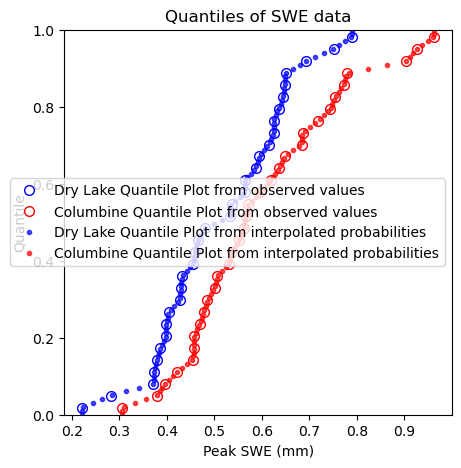

In [359]:
plt.figure(figsize=(5,5))

# Here we use the actual values from the dataset to create the plots
Butte_ordered, Butte_quantile = cunnane_quantile_array(df_quantiles['Butte'])
Schofield_ordered, Schofield_quantile = cunnane_quantile_array(data['Schofield'])
plt.plot(Butte_ordered, Butte_quantile, 'o', markeredgecolor='b', markerfacecolor='None', markersize=7, label='Dry Lake Quantile Plot from observed values')
plt.plot(Schofield_ordered, Schofield_quantile, 'o', markeredgecolor='r', markerfacecolor='None', markersize=7, label='Columbine Quantile Plot from observed values')


# We can also create these by picking arbitrary quantile values, then using the scipy.stats.mstats.mquantiles function
quantiles = np.linspace(0,1,100) # 100 quantile values linearly spaced between 0 and 1
plt.plot(stats.mstats.mquantiles(df_quantiles['Butte'], quantiles), quantiles, 
         'b.', label='Dry Lake Quantile Plot from interpolated probabilities', alpha=0.7)
plt.plot(stats.mstats.mquantiles(data['Schofield'], quantiles), quantiles, 
         'r.', label='Columbine Quantile Plot from interpolated probabilities', alpha=0.7)

plt.ylabel('Quantile')
plt.xlabel('Peak SWE (mm)')
#plt.xlim((0,2500))
plt.ylim((0,1))
plt.title('Quantiles of SWE data')
plt.legend(loc="best");

In [360]:
quantiles = np.linspace(0,1,100)

# This is our empirical cdf of the Slide Canyon data, which also includes values down to 0 and up to 1.
Schofield_ordered = stats.mstats.mquantiles(data['Schofield'], quantiles)

# This is our empirical cdf of the Blue Canyon data, which also includes values down to 0 and up to 1.
Butte_ordered = stats.mstats.mquantiles(data['Butte'], quantiles)

In [361]:
# Create our interpolation function for looking up a quantile given a value of SWE at Slide Canyon
f_Schofield = interp1d(Schofield_ordered, quantiles)
# Create our interpolation function for looking up SWE at Blue Canyon given a quantile
g_Butte = interp1d(quantiles, Butte_ordered)

# Now, we can create a prediction for every value in the Slide Canyon dataset to come up with a matching prediction for the Blue Canyon dataset
Butte_predicted=g_Butte( f_Schofield( data['Schofield'] ) )

In [362]:
df_quantiles['Butte_predicted'] = Butte_predicted

In [363]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_quantiles).mark_circle().encode(
        x = alt.X('Butte').title('Dry Lake SNOTEL SWE (m)'), 
        y = alt.Y('Butte_predicted').title('Dry Lake SNOTEL SWE predicted with Columbine SWE Quantiles (m)') 
    ).properties(title='Predicted SWE from Quantile SWE')

combined = (station_predict + line2 ) 
combined

alt.LayerChart(...)

In [364]:
df_quantiles['difference'] = df_quantiles['Butte'] - df_quantiles['Butte_predicted']
df_quantiles['difference'].mean()

-0.00015433879457097711

In [365]:
print('R value: ', np.corrcoef(df_quantiles['Butte'], df_quantiles['Butte_predicted'])[0,1])

R value:  0.9501127279007044


In [366]:
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'MD'] = df_quantiles['difference'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'RMSE'] = np.sqrt((df_quantiles['difference']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Dry Lake') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'R'] = np.corrcoef(df_quantiles['Butte'], df_quantiles['Butte_predicted'])[0,1]

In [286]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred).mark_circle().encode(
        x = alt.X('station_swe').title('Dry Lake SNOTEL SWE (m)'), 
        y = alt.Y('swe_pred'), #.title('Butte SNOTEL SWE predicted with Schofield Pass SNVs (m)'),
    color=alt.value('#000000') 
    ).properties(title='Predicted SWE from Untransformed Values')

station_predict_log = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Dry Lake SNOTEL SWE (m)'), 
        y = alt.Y('swe_pred_log_trans'), #.title('Butte SNOTEL SWE predicted with Schofield Pass Ln(SNVs) (m)') 
    ).properties(title='Predicted SWE')

station_predict_quantile = alt.Chart(df_quantiles).mark_circle().encode(
        x = alt.X('Butte').title('Dry Lake SNOTEL SWE (m)'), 
        y = alt.Y('Butte_predicted'), #.title('Butte SNOTEL SWE predicted with Schofield Pass SWE Quantiles (m)'),
    color=alt.value('#ff0000')
    ).properties(title='Predicted SWE')

combined = (station_predict + line2 + station_predict_log + station_predict_quantile) 
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

## And with a third site: Spud Mountain (780) predicting Bear Town (327):

### Plot Distributions of test sites:

In [367]:
site1 = '327_CO_SNTL' #Bear Town
site2 = '780_CO_SNTL' #Spud Mountain

In [368]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [369]:
swe_temp['Spud Mountain SWE'] = df.loc[pd.IndexSlice[site2],'station_swe'].values
swe_temp['Bear Town SWE'] = df.loc[pd.IndexSlice[site1],'station_swe'].values

In [370]:
df_reset = df.loc[pd.IndexSlice[site1]]
site1_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site1]]
site1_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site1_unt, site1_ln)
combined

alt.HConcatChart(...)

In [371]:
df_reset = df.loc[pd.IndexSlice[site2]]
site2_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site2]]
site2_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site2_unt, site2_ln)
combined

alt.HConcatChart(...)

### Predict SWE at Butte using untransformed data from Schofield Pass:

In [372]:
swe_pred = (df.loc[pd.IndexSlice[site2],'station_n'] * df.loc[pd.IndexSlice[site1],'reanalysis_swe'].std()) + df.loc[pd.IndexSlice[site1],'reanalysis_swe'].mean()

In [373]:
df_swe_pred = pd.DataFrame(swe_real)

In [374]:
df_swe_pred['swe_pred'] = swe_pred

In [375]:
df_swe_pred['difference'] = df_swe_pred['station_swe'] - df_swe_pred['swe_pred']

In [376]:
df_swe_pred['difference'].mean()

0.013424382820129343

In [377]:
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Bear Town') & (metrics_df.index.get_level_values(1)=='Untransformed SNV'), 'MD'] = df_swe_pred['difference'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Bear Town') & (metrics_df.index.get_level_values(1)=='Untransformed SNV'), 'RMSE'] = np.sqrt((df_swe_pred['difference']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Bear Town') & (metrics_df.index.get_level_values(1)=='Untransformed SNV'), 'R'] = np.corrcoef(df_swe_pred['station_swe'], df_swe_pred['swe_pred'])[0,1]

In [296]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred).mark_circle().encode(
        x = alt.X('station_swe').title('Bear Town SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred').title('Bear Town SNOTEL SWE predicted with Spud Mountain SNVs (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE from Untransformed Values')

annotation = alt.Chart(df_swe_pred).mark_text(
    align='left',
    baseline='middle',
    fontSize = 20
).encode(
    text='A'
)

# text = base.mark_text(baseline="middle").encode(
#     text="num_cars:Q",
#     color=alt.condition(
#         alt.datum.num_cars > 100,
#         alt.value("black"),
#         alt.value("white"),
#     ),
# )

combined = (station_predict + line2 ) #+ annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [192]:
print('R value: ', np.corrcoef(df_swe_pred['station_swe'], df_swe_pred['swe_pred'])[0,1])

R value:  0.8565852797223394


### Predict SWE using log values:

In [378]:
site2 = '780_CO_SNTL'
site1 = '327_CO_SNTL'

In [379]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [380]:
df.loc[pd.IndexSlice[site1],'log_reanalysis_swe']

year
1990   -0.622875
1991   -0.399881
1992   -0.454760
1993   -0.410377
1994   -0.783510
1995   -0.305167
1996   -0.956592
1997   -0.434791
1998   -0.251800
1999   -0.877551
2000   -0.469684
2001   -0.602210
2002   -1.048109
2003   -0.455076
2004   -0.614336
2005   -0.690750
2006   -0.735220
2007   -0.801178
2008   -0.421899
2009   -0.995875
2010   -0.981897
2011   -0.758860
2012   -0.476424
2013   -1.439695
2014   -0.820981
2015   -1.066532
2016   -1.148854
2017   -0.633370
2018   -1.302689
2019   -0.302999
2020   -0.383606
2021   -0.543005
Name: log_reanalysis_swe, dtype: float32

In [381]:
swe_pred_log = (df.loc[pd.IndexSlice[site2],'log_station_n'] * df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].replace([np.inf, -np.inf], np.nan, inplace=False).std()) + df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].replace([np.inf, -np.inf], np.nan, inplace=False).mean()

In [382]:
df_swe_pred_log = pd.DataFrame(swe_real)

In [383]:
df_swe_pred_log['swe_pred_log'] = swe_pred_log

In [384]:
df_swe_pred_log['swe_pred_log_trans'] = math.e**df_swe_pred_log['swe_pred_log']

In [385]:
df_swe_pred_log['difference'] = df_swe_pred_log['station_swe'] - df_swe_pred_log['swe_pred_log_trans']

In [386]:
df_swe_pred_log['difference'].mean()

0.012508787427824682

In [387]:
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Bear Town') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'MD'] = df_swe_pred_log['difference'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Bear Town') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'RMSE'] = np.sqrt((df_swe_pred_log['difference']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Bear Town') & (metrics_df.index.get_level_values(1)=='Natural Log SNV'), 'R'] = np.corrcoef(df_swe_pred_log['station_swe'], df_swe_pred_log['swe_pred_log_trans'])[0,1]

In [308]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Bear Town SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred_log_trans').title('Bear Town SNOTEL SWE predicted with Spud Mountain Ln(SNVs) (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

annotation = alt.Chart(df_swe_pred_log).mark_text(
    align='left',
    baseline='middle',
    fontSize = 20
).encode(
    text='A'
)

# text = base.mark_text(baseline="middle").encode(
#     text="num_cars:Q",
#     color=alt.condition(
#         alt.datum.num_cars > 100,
#         alt.value("black"),
#         alt.value("white"),
#     ),
# )

combined = (station_predict + line2) # + annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [205]:
print('R value: ', np.corrcoef(df_swe_pred_log['station_swe'], df_swe_pred_log['swe_pred_log_trans'])[0,1])

R value:  0.8608295420578269


### Predict SWE with Quantile Mapping:

In [388]:
site2 = '780_CO_SNTL'
site1 = '327_CO_SNTL'

In [389]:
data = {'Butte':df.loc[pd.IndexSlice[site1],'station_swe'].values, 'Schofield':df.loc[pd.IndexSlice[site2],'station_swe'].values}

In [390]:
df_quantiles = pd.DataFrame(data)

In [391]:
Butte_quantile

array([0.01863354, 0.04968944, 0.08074534, 0.11180124, 0.14285714,
       0.17391304, 0.20496894, 0.23602484, 0.26708075, 0.29813665,
       0.32919255, 0.36024845, 0.39130435, 0.42236025, 0.45341615,
       0.48447205, 0.51552795, 0.54658385, 0.57763975, 0.60869565,
       0.63975155, 0.67080745, 0.70186335, 0.73291925, 0.76397516,
       0.79503106, 0.82608696, 0.85714286, 0.88819876, 0.91925466,
       0.95031056, 0.98136646])

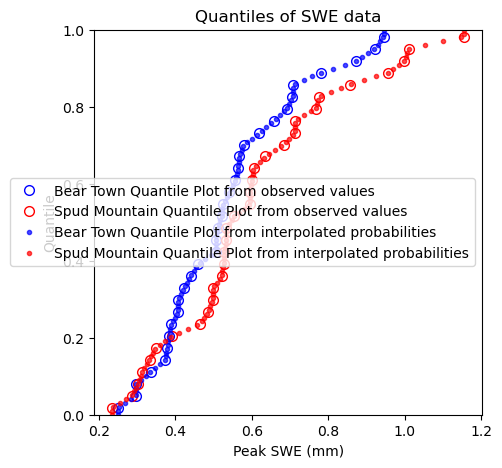

In [392]:
plt.figure(figsize=(5,5))

# Here we use the actual values from the dataset to create the plots
Butte_ordered, Butte_quantile = cunnane_quantile_array(df_quantiles['Butte'])
Schofield_ordered, Schofield_quantile = cunnane_quantile_array(data['Schofield'])
plt.plot(Butte_ordered, Butte_quantile, 'o', markeredgecolor='b', markerfacecolor='None', markersize=7, label='Bear Town Quantile Plot from observed values')
plt.plot(Schofield_ordered, Schofield_quantile, 'o', markeredgecolor='r', markerfacecolor='None', markersize=7, label='Spud Mountain Quantile Plot from observed values')


# We can also create these by picking arbitrary quantile values, then using the scipy.stats.mstats.mquantiles function
quantiles = np.linspace(0,1,100) # 100 quantile values linearly spaced between 0 and 1
plt.plot(stats.mstats.mquantiles(df_quantiles['Butte'], quantiles), quantiles, 
         'b.', label='Bear Town Quantile Plot from interpolated probabilities', alpha=0.7)
plt.plot(stats.mstats.mquantiles(data['Schofield'], quantiles), quantiles, 
         'r.', label='Spud Mountain Quantile Plot from interpolated probabilities', alpha=0.7)

plt.ylabel('Quantile')
plt.xlabel('Peak SWE (mm)')
#plt.xlim((0,2500))
plt.ylim((0,1))
plt.title('Quantiles of SWE data')
plt.legend(loc="best");

In [393]:
quantiles = np.linspace(0,1,100)

# This is our empirical cdf of the Slide Canyon data, which also includes values down to 0 and up to 1.
Schofield_ordered = stats.mstats.mquantiles(data['Schofield'], quantiles)

# This is our empirical cdf of the Blue Canyon data, which also includes values down to 0 and up to 1.
Butte_ordered = stats.mstats.mquantiles(data['Butte'], quantiles)

In [394]:
f_Schofield

In [395]:
# Create our interpolation function for looking up a quantile given a value of SWE at Slide Canyon
f_Schofield = interp1d(Schofield_ordered, quantiles)
# Create our interpolation function for looking up SWE at Blue Canyon given a quantile
g_Butte = interp1d(quantiles, Butte_ordered)

# Now, we can create a prediction for every value in the Slide Canyon dataset to come up with a matching prediction for the Blue Canyon dataset
Butte_predicted=g_Butte( f_Schofield( data['Schofield'] ) )

In [396]:
df_quantiles['Butte_predicted'] = Butte_predicted

In [397]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_quantiles).mark_circle().encode(
        x = alt.X('Butte').title('Bear Town SNOTEL SWE (m)'), 
        y = alt.Y('Butte_predicted').title('Bear Town SNOTEL SWE predicted with Spud Mountain SWE Quantiles (m)') 
    ).properties(title='Predicted SWE from Quantile SWE')

combined = (station_predict + line2 ) 
combined

alt.LayerChart(...)

In [398]:
df_quantiles['difference'] = df_quantiles['Butte'] - df_quantiles['Butte_predicted']
df_quantiles['difference'].mean()

-0.002338250092470932

In [399]:
print('R value: ', np.corrcoef(df_quantiles['Butte'], df_quantiles['Butte_predicted'])[0,1])

R value:  0.8693104441802266


In [401]:
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Bear Town') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'MD'] = df_quantiles['difference'].mean()
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Bear Town') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'RMSE'] = np.sqrt((df_quantiles['difference']**2).mean())
metrics_df.loc[(metrics_df.index.get_level_values(0)=='Bear Town') & (metrics_df.index.get_level_values(1)=='Quantile Mapping'), 'R'] = np.corrcoef(df_quantiles['Butte'], df_quantiles['Butte_predicted'])[0,1]

In [402]:
metrics_df

R        MD      RMSE
Butte     Untransformed SNV   0.91681 -0.070615  0.090286
          Natural Log SNV    0.917291 -0.072598  0.096985
          Quantile Mapping    0.91272 -0.000645  0.047611
Dry Lake  Untransformed SNV  0.905509  0.053282  0.137679
          Natural Log SNV         NaN       NaN       NaN
          Quantile Mapping   0.950113 -0.000154  0.042134
Bear Town Untransformed SNV  0.856585  0.013424  0.092209
          Natural Log SNV     0.86083  0.012509  0.090655
          Quantile Mapping    0.86931 -0.002338    0.0902

In [321]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred).mark_circle().encode(
        x = alt.X('station_swe').title('Bear Town SNOTEL SWE (m)'), 
        y = alt.Y('swe_pred'), #.title('Butte SNOTEL SWE predicted with Schofield Pass SNVs (m)'),
    color=alt.value('#000000') 
    ).properties(title='Predicted SWE from Untransformed Values')

station_predict_log = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Bear Town SNOTEL SWE (m)'), 
        y = alt.Y('swe_pred_log_trans'), #.title('Butte SNOTEL SWE predicted with Schofield Pass Ln(SNVs) (m)') 
    ).properties(title='Predicted SWE')

station_predict_quantile = alt.Chart(df_quantiles).mark_circle().encode(
        x = alt.X('Butte').title('Bear Town SNOTEL SWE (m)'), 
        y = alt.Y('Butte_predicted'), #.title('Butte SNOTEL SWE predicted with Schofield Pass SWE Quantiles (m)'),
    color=alt.value('#ff0000')
    ).properties(title='Predicted SWE')

combined = (station_predict + line2 + station_predict_log + station_predict_quantile) 
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [30]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

stations1 = alt.Chart(swe_temp[['Butte SWE', 'Schofield Pass SWE']]).mark_circle().encode(
        x = alt.X('Butte SWE').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('Schofield Pass SWE').title('Schofield Pass SWE (m)') 
    )#.properties(title='Predicted SWE from Untransformed Values')

stations2 = alt.Chart(swe_temp[['Columbine SWE', 'Dry Lake SWE']]).mark_circle().encode(
        y = alt.Y('Columbine SWE').title('Columbine SNOTEL SWE (m)'), 
        x = alt.X('Dry Lake SWE').title('Dry Lake SWE (m)') 
    )#.properties(title='Predicted SWE from Untransformed Values')

stations3 = alt.Chart(swe_temp[['Bear Town SWE', 'Spud Mountain SWE']]).mark_circle().encode(
        x = alt.X('Bear Town SWE').title('Bear Town SNOTEL SWE (m)'), 
        y = alt.Y('Spud Mountain SWE').title('Spud Mountain SWE (m)') 
    )#.properties(title='Predicted SWE from Untransformed Values')

combined = alt.hconcat((stations1 + line2), (stations2 + line2), (stations3 + line2)) 
combined

alt.HConcatChart(...)

In [423]:
metrics_df

R        MD      RMSE
Butte     Untransformed SNV   0.91681 -0.070615  0.090286
          Natural Log SNV    0.917291 -0.072598  0.096985
          Quantile Mapping    0.91272 -0.000645  0.047611
Dry Lake  Untransformed SNV  0.933018  0.077926  0.113895
          Natural Log SNV    0.905509  0.053282  0.137679
          Quantile Mapping   0.950113 -0.000154  0.042134
Bear Town Untransformed SNV  0.856585  0.013424  0.092209
          Natural Log SNV     0.86083  0.012509  0.090655
          Quantile Mapping    0.86931 -0.002338    0.0902

In [426]:
metrics_df_reindex = metrics_df.reset_index()

In [429]:
metrics_df_reindex.columns

MultiIndex([('level_0',),
            ('level_1',),
            (      'R',),
            (     'MD',),
            (   'RMSE',)],
           )

In [432]:
metrics_df2 = metrics_df.copy()

In [433]:
metrics_df2.columns = metrics_df.columns.map(''.join)

In [435]:
metrics_df2 = metrics_df2.reset_index()

In [436]:
metrics_df2

level_0            level_1         R        MD      RMSE
0      Butte  Untransformed SNV   0.91681 -0.070615  0.090286
1      Butte    Natural Log SNV  0.917291 -0.072598  0.096985
2      Butte   Quantile Mapping   0.91272 -0.000645  0.047611
3   Dry Lake  Untransformed SNV  0.933018  0.077926  0.113895
4   Dry Lake    Natural Log SNV  0.905509  0.053282  0.137679
5   Dry Lake   Quantile Mapping  0.950113 -0.000154  0.042134
6  Bear Town  Untransformed SNV  0.856585  0.013424  0.092209
7  Bear Town    Natural Log SNV   0.86083  0.012509  0.090655
8  Bear Town   Quantile Mapping   0.86931 -0.002338    0.0902

In [443]:
r_plot = alt.Chart(metrics_df2).mark_bar().encode(
    x='level_1:O',
    y='R:Q',
    color='level_1:N',
    column='level_0:N'
).properties(title='')

md_plot = alt.Chart(metrics_df2).mark_bar().encode(
    x='level_1:O',
    y='MD:Q',
    color='level_1:N',
    column='level_0:N'
).properties(title='')

rmse_plot = alt.Chart(metrics_df2).mark_bar().encode(
    x='level_1:O',
    y='RMSE:Q',
    color='level_1:N',
    column='level_0:N'
).properties(title='')

concat = alt.hconcat(r_plot, md_plot, rmse_plot)
concat

alt.HConcatChart(...)

## Test Normalcy of Stations:

#### Untransformed Values, Shapiro-Wilkes:

In [398]:
normal_stats = []
normal_pvalue = []

for site in df.index.get_level_values(0).unique():
    shapiro = stats.shapiro(df.loc[pd.IndexSlice[site],'station_swe'])
    normal_stats.append(shapiro)
    normal_pvalue.append(shapiro[1])
    

In [394]:
#normal_pvalue

norm = [x for x in normal_pvalue if x > 0.05]
not_norm = [x for x in normal_pvalue if x <= 0.05]

In [396]:
len(norm) / (len(normal_pvalue))

0.8337078651685393

#### Untransformed Values, Kolmogorov-Smirnov:

In [ ]:
stats.kstest(stats.uniform.rvs(size=100, random_state=rng),

             stats.norm.cdf)

In [46]:
normal_stats_ks = []
normal_pvalue_ks = []

for site in df.index.get_level_values(0).unique():
    kol = stats.kstest(df.loc[pd.IndexSlice[site],'station_swe'].values, stats.norm.cdf)
    normal_stats_ks.append(kol)
    normal_pvalue_ks.append(kol[1])

In [47]:
norm_ks = [x for x in normal_pvalue_ks if x > 0.05]
not_norm_ks = [x for x in normal_pvalue_ks if x <= 0.05]

In [48]:
len(norm_ks) / (len(normal_pvalue_ks))

0.0

#### Natural Log Values Shapiro-Wilks:

In [26]:
df['log_station_swe'] = np.log(df['station_swe'] + 1)

In [399]:
normal_stats_log = []
normal_pvalue_log = []

for site in df.index.get_level_values(0).unique():
    shapiro = stats.shapiro(df.loc[pd.IndexSlice[site],'log_station_swe'])
    normal_stats_log.append(shapiro)
    normal_pvalue_log.append(shapiro[1])

In [400]:
norm_log = [x for x in normal_pvalue_log if x > 0.05]
not_norm_log = [x for x in normal_pvalue_log if x <= 0.05]

In [401]:
len(norm_log) / (len(normal_pvalue_log))

0.7730337078651686

#### Natural Log Values Kolmogorov-Smirnov:

In [17]:
df.index.get_level_values(0).unique()[0]

'301_CA_SNTL'

In [19]:
df.loc[pd.IndexSlice[site],'log_station_swe']

year
1990   -1.644858
1991   -1.950240
1992   -4.876979
1993   -0.857597
1994   -1.521244
1995   -0.541869
1996   -0.964956
1997   -1.532940
1998   -0.642872
1999   -0.672286
2000   -1.222001
2001   -2.286712
2002   -1.222001
2003   -2.509855
2004   -1.486955
2005   -1.312152
2006   -0.991985
2007   -2.146950
2008   -1.092789
2009   -1.275111
2010   -1.085242
2011   -0.744483
2012   -1.756083
2013   -3.410642
2014   -2.392072
2015        -inf
2016   -0.906687
2017   -0.728567
2018   -1.915148
2019   -0.609615
2020   -1.685132
2021   -1.275111
Name: log_station_swe, dtype: float64

In [23]:
df.loc[pd.IndexSlice[site],'log_station_swe'].

masked_array(data=[-1.6448578576653607, -1.9502395072165428,
                   -4.876978909283582, -0.8575973855349368,
                   -1.521243901698184, -0.5418691943974523,
                   -0.9649559038554361, -1.5329399414613756,
                   -0.6428724046863229, -0.6722862898926161,
                   -1.2220010068453273, -2.2867117438377558,
                   -1.2220010068453273, -2.509855295151965,
                   -1.486954828219552, -1.3121521038396247,
                   -0.9919845762433553, -2.146949801462597,
                   -1.092789275365321, -1.2751108321592757,
                   -1.085242069729938, -0.7444825810971053,
                   -1.7560834927755853, -3.4106418404901553,
                   -2.392072259495582, --, -0.9066869957314603,
                   -0.7285671257912057, -1.9151481874052727,
                   -0.6096151829298405, -1.6851317568033006,
                   -1.2751108321592757],
             mask=[False, False, False, False, F

In [32]:
df.loc[pd.IndexSlice[site],'log_station_swe']

year
1990    0.176505
1991    0.132991
1992    0.007591
1993    0.353596
1994    0.197571
1995    0.458475
1996    0.322808
1997    0.195485
1998    0.422506
1999    0.412467
2000    0.258233
2001    0.096764
2002    0.258233
2003    0.078146
2004    0.203806
2005    0.238418
2006    0.315424
2007    0.110503
2008    0.289141
2009    0.246391
2010    0.291041
2011    0.388644
2012    0.159326
2013    0.032487
2014    0.087498
2015    0.000000
2016    0.339226
2017    0.393797
2018    0.137429
2019    0.434091
2020    0.170097
2021    0.246391
Name: log_station_swe, dtype: float64

In [45]:
site = df.index.get_level_values(0).unique()[0]
kol = stats.kstest(df.loc[pd.IndexSlice[site],'station_swe'], 'lognorm')
#(xvals, cdf, args=args, alternative=alternative,
#                        method=method, _no_deco=True)

TypeError: _parse_args() missing 1 required positional argument: 's'

In [34]:
stats.lognorm.cdf

<bound method rv_continuous.cdf of <scipy.stats._continuous_distns.lognorm_gen object at 0x135851d60>>

In [16]:
normal_stats_ks_log = []
normal_pvalue_ks_log = []

for site in df.index.get_level_values(0).unique():
    kol = stats.kstest(df.loc[pd.IndexSlice[site],'log_station_swe'], stats.lognorm.cdf)
    normal_stats_ks_log.append(kol)
    normal_pvalue_ks_log.append(kol[1])

TypeError: _parse_args() missing 1 required positional argument: 's'

In [400]:
norm_log = [x for x in normal_pvalue_log if x > 0.05]
not_norm_log = [x for x in normal_pvalue_log if x <= 0.05]

In [401]:
len(norm_log) / (len(normal_pvalue_log))

0.7730337078651686

In [ ]:
# Calculate theoretical normal CDF values
x = np.sort(data)
cdf_values = stats.norm.cdf(x)

# Calculate differences between data and theoretical CDF
differences = data - cdf_values

# Print some results (optional)
print("First 10 differences:")
print(differences[:10])

In [55]:
df.loc[pd.IndexSlice[site],'station_swe'].values

array([0.445008, 0.635   , 0.470154, 1.209802, 0.475234, 2.279904,
       0.645668, 0.886968, 1.978914, 0.902208, 0.633984, 0.438912,
       0.765048, 0.466344, 0.131064, 1.149096, 0.88392 , 0.4572  ,
       0.737108, 0.697738, 0.712978, 1.377442, 0.42037 , 0.347218,
       0.447802, 0.036576, 0.841248, 1.033272, 0.371856, 0.978408,
       0.460248, 0.551688])

In [74]:
# Calculate theoretical normal CDF values
max_standnorm = []

for site in df.index.get_level_values(0).unique():
    data = df.loc[pd.IndexSlice[site],'station_swe'].values
    x = np.sort(data)
    cdf_values = stats.norm.cdf(x)
    
    # Calculate differences between data and theoretical CDF
    differences = x - cdf_values
    max_standnorm.append(max(abs(differences)))

In [63]:
max_standnorm

[0.6642827272437305,
 0.4244350287272951,
 0.6425821069051526,
 0.4650365637686553,
 0.35616891145994983,
 0.4957199907913746,
 0.41271937989784696,
 0.3768677037960996,
 0.4439769104189857,
 0.5571081532423299,
 0.5960133288310475,
 0.46017106445947686,
 0.5456416412455436,
 0.5271227272437304,
 0.4379763755882196,
 1.353521952621628,
 0.6132053806045774,
 0.38485173987505883,
 0.4579995221591017,
 0.4462663580376886,
 0.5992707579177644,
 0.5802500877165502,
 0.6493402910929429,
 1.0110180374288198,
 0.7382754614057424,
 0.5760194639467607,
 0.4532163755882197,
 0.6012330509866156,
 0.5776763755882196,
 0.433874047826331,
 0.5009313965139833,
 0.7754511037846288,
 0.7049503000146589,
 0.4575213737451823,
 0.6789698179689756,
 0.7463155089183731,
 0.3608901653657243,
 0.9858179079874223,
 0.5374890195726231,
 0.46492791497473474,
 0.34689475721065255,
 1.2374626958158201,
 0.37297303279201266,
 0.45636315411762607,
 0.8439726395974895,
 0.6457563508201801,
 0.38788138131622674,
 0.483

In [75]:
max_lognorm = []

for site in df.index.get_level_values(0).unique():
    data = df.loc[pd.IndexSlice[site],'log_station_swe'].values
    x = np.sort(data)
    cdf_values = stats.lognorm.cdf(x, s=np.std(df.loc[pd.IndexSlice[site],'station_swe'].values))
    
    # Calculate differences between data and theoretical CDF
    differences = x - cdf_values
    max_lognorm.append(max(abs(differences)))

In [72]:
x

array([0.03592297, 0.12315878, 0.29804173, 0.31616457, 0.3509174 ,
       0.36388727, 0.36811486, 0.37004654, 0.37651679, 0.37860628,
       0.38277223, 0.38536716, 0.38881662, 0.43934337, 0.4910212 ,
       0.4916428 , 0.49814638, 0.52929678, 0.53823338, 0.55222166,
       0.56817789, 0.6104436 , 0.63335471, 0.63497131, 0.64301532,
       0.68229248, 0.70964632, 0.76504729, 0.79290292, 0.86602512,
       1.0915588 , 1.18781415])

In [73]:
cdf_values

array([3.75401375e-13, 3.17897538e-06, 4.53741873e-03, 6.53260356e-03,
       1.19978185e-02, 1.46669220e-02, 1.56172099e-02, 1.60648952e-02,
       1.76269513e-02, 1.81522189e-02, 1.92302230e-02, 1.99225893e-02,
       2.08680248e-02, 3.81306411e-02, 6.26250994e-02, 6.29616942e-02,
       6.65419339e-02, 8.51389158e-02, 9.09016896e-02, 1.00286646e-01,
       1.11512865e-01, 1.43694884e-01, 1.62447603e-01, 1.63801471e-01,
       1.70594362e-01, 2.04963354e-01, 2.29863791e-01, 2.81879174e-01,
       3.08473337e-01, 3.78264056e-01, 5.74887837e-01, 6.44675712e-01])

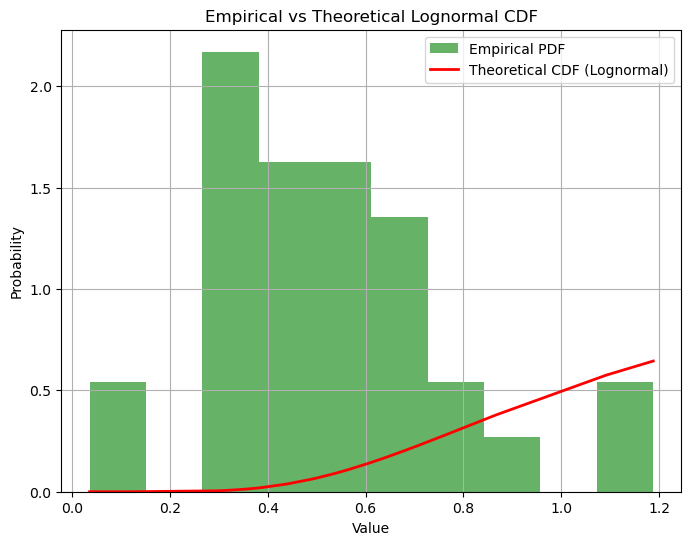

In [81]:
# Plotting the empirical CDF vs theoretical CDF
plt.figure(figsize=(8, 6))
plt.hist(data, bins=10, density=True, alpha=0.6, color='g', label='Empirical PDF')
plt.plot(x, cdf_values, 'r-', lw=2, label='Theoretical CDF (Lognormal)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Empirical vs Theoretical Lognormal CDF')
plt.legend(loc='best')
plt.grid(True)
plt.show()

(0.0, 2.0)

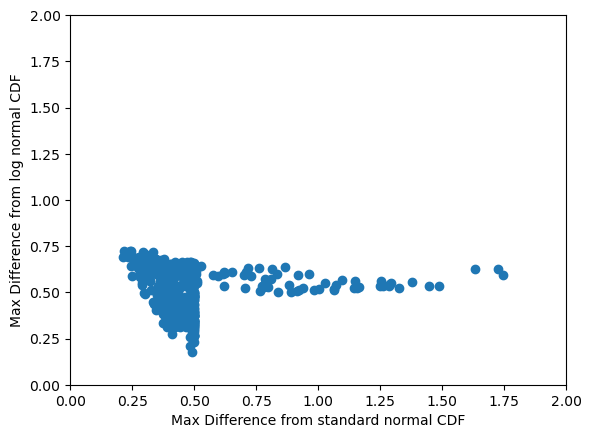

In [77]:
fig, ax = plt.subplots()
plt.scatter(max_standnorm, max_lognorm)
plt.xlabel('Max Difference from standard normal CDF')
plt.ylabel('Max Difference from log normal CDF')
plt.xlim(0,2)
plt.ylim(0,2)

(array([101., 286.,   8.,  15.,  10.,   7.,   9.,   4.,   2.,   3.]),
 array([0.21251883, 0.36589117, 0.5192635 , 0.67263584, 0.82600817,
        0.97938051, 1.13275284, 1.28612518, 1.43949751, 1.59286985,
        1.74624218]),
 <BarContainer object of 10 artists>)

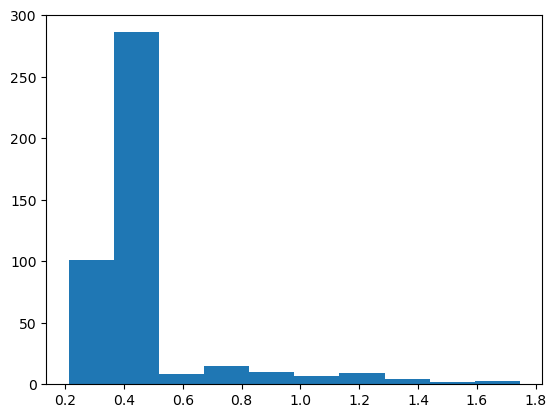

In [78]:
plt.hist(max_standnorm)

(array([ 2.,  9., 24., 47., 48., 59., 74., 77., 65., 40.]),
 array([0.17650467, 0.23129911, 0.28609354, 0.34088798, 0.39568241,
        0.45047684, 0.50527128, 0.56006571, 0.61486015, 0.66965458,
        0.72444902]),
 <BarContainer object of 10 artists>)

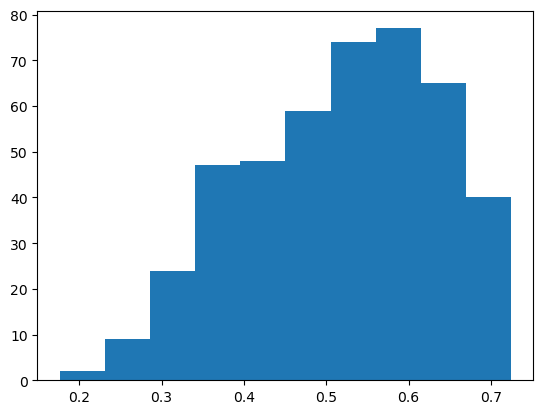

In [79]:
plt.hist(max_lognorm)

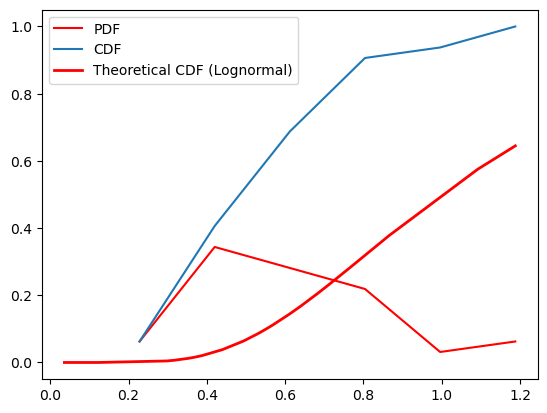

In [85]:
# getting data of the histogram 
count, bins_count = np.histogram(data, bins=6) 
  
# finding the PDF of the histogram using count values 
pdf = count / sum(count) 
  
# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
cdf = np.cumsum(pdf) 
  
# plotting PDF and CDF 
plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
plt.plot(bins_count[1:], cdf, label="CDF") 
plt.plot(x, cdf_values, 'r-', lw=2, label='Theoretical CDF (Lognormal)')
plt.legend() 

In [83]:
np.sqrt(32)

5.656854249492381

### Use Steven's code from DAWS:

In [86]:
def cunnane_quantile(df, column_name):
    '''This function will compute the Cunnane plotting position for the values in a column of a dataframe.
    It requres a pandas dataframe, and the column name of interest (a text string) as inputs.
    The output is a new dataframe, ranked (sorted) with an extra column with the plotting position.'''
    
    # Rank all our values
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    
    # Calculate the Cunnane plotting position
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) / (ranked_df[column_name].count() + (1/5))
        
    return ranked_df

In [120]:
data = df.loc[pd.IndexSlice[site],'station_swe'].values

In [121]:
df_test = pd.DataFrame(data, columns=['data'])

In [122]:
ranked_df = cunnane_quantile(df_test,'data')

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_12441/3146695911.py:11: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Cumulative Frequency\nProbability of value $\leq$ given value (CDF)', fontsize=15)


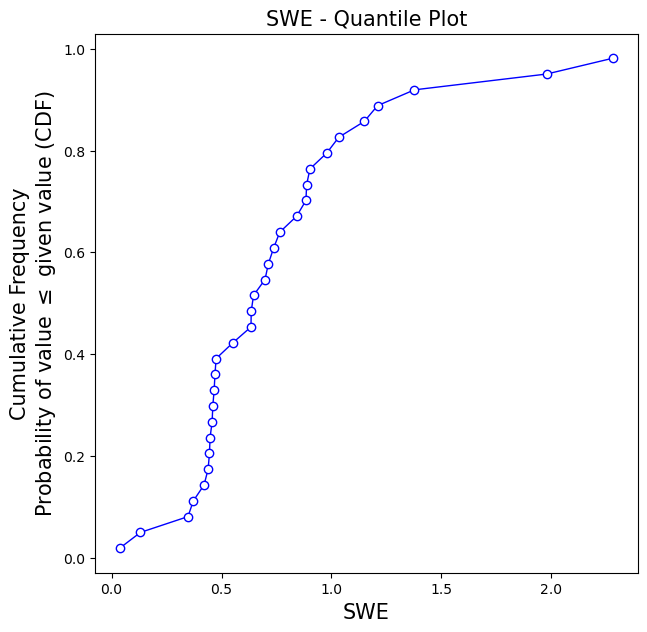

In [124]:
# Create a new figure for the quantile plot
fig, ax = plt.subplots(figsize=(7,7))
# Plot the ranked data against the plotting position
ranked_df.plot(x='data',y='cunnane_plotting_position', 
               linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='b', 
               color='b', ax=ax, legend=False)

# Label the axes and title.
ax.set_xlabel('SWE', fontsize=15)
ax.set_ylabel('Cumulative Frequency\nProbability of value $\leq$ given value (CDF)', fontsize=15)
ax.set_title('SWE - Quantile Plot',  fontsize=15);


In [125]:
# To create the theoretical CDF, we need the sample values, the mean, and standard deviation of our data set
sample_values = df_test['data'].sort_values() # sort our data
sample_mean = df_test['data'].mean()
sample_std = df_test['data'].std(ddof=1) # Note our ddof=1 here

# Create a theoretical normal CDF based on our sample values
normal_cdf = stats.norm.cdf(sample_values, sample_mean, sample_std)

<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_12441/1545054784.py:15: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Cumulative Frequency\nProbability of value $\leq$ given value (CDF)', fontsize=15)


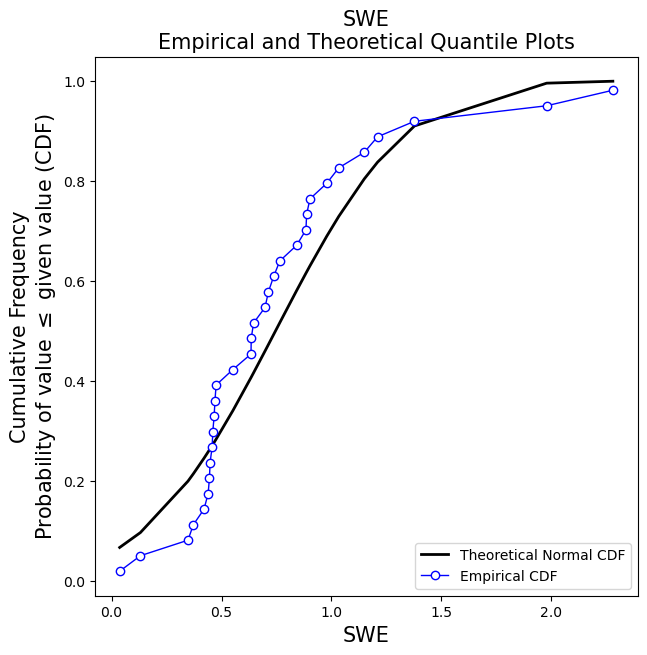

In [126]:
fig, ax = plt.subplots(figsize=(7,7))

# Theoretical CDF
plt.plot(sample_values,normal_cdf,'k-', lw=2, label='Theoretical Normal CDF')

# Empirical CDF
ranked_df.plot(x='data',y='cunnane_plotting_position', 
               linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='b', 
               color='b', ax=ax, legend=False, label='Empirical CDF')

# Label the axes and title.
plt.legend(loc='lower right')
ax.set_xlabel('SWE', fontsize=15)
ax.set_ylabel('Cumulative Frequency\nProbability of value $\leq$ given value (CDF)', fontsize=15)
ax.set_title('SWE\nEmpirical and Theoretical Quantile Plots',  fontsize=15);

Code from Steven Pestana, https://mountain-hydrology-research-group.github.io/data-analysis/modules/module2/lab2-1.html

In [127]:
### Method 1
# This function requires that the input is a pandas dataframe, with column names, and an integer index
# It returns a copy of the dataframe with an extra column added that has the Cunnane plotting positions
def cunnane_quantile(df, column_name):
    '''This function will compute the Cunnane plotting position for the values in a column of a dataframe.
    It requres a pandas dataframe, and the column name of interest (a text string) as inputs.
    The output is a new dataframe, ranked (sorted) with an extra column with the plotting position.
    [Steven Pestana, spestana@uw.edu, Oct. 2020]'''
    
    # Rank all our values
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    
    # Calculate the Cunnane plotting position
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) / (ranked_df[column_name].count() + (1/5))
        
    return ranked_df

### Method 2
# This function should be able to accept any one-dimensional numpy array or list, of numbers
# It returns two numpy arrays, one of the sorted numbers, the other of the plotting position
def cunnane_quantile_array(numbers):
    '''This function also computes the Cunnane plotting position given an array or list of numbers (rather than a pandas dataframe).
    It has two outputs, first the sorted numbers, second the Cunnane plotting position for each of those numbers.
    [Steven Pestana, spestana@uw.edu, Oct. 2020]'''
    
    # 1) sort the data, using the numpy sort function (np.sort())
    sorted_numbers = np.sort(numbers)
    
    # length of the list of numbers
    n = len(sorted_numbers) 
    
    # make an empty array, of the same length. below we will add the plotting position values to this array
    cunnane_plotting_position = np.empty(n)
    
    # 2) compute the Cunnane plotting position for each number, using a for loop and the enumerate function
    for rank, number in enumerate(sorted_numbers):
        cunnane_plotting_position[rank] = ( (rank+1) - (2/5) ) / ( n + (1/5) )
    
    return sorted_numbers, cunnane_plotting_position

#### Compare the empirical CDF with a theoretical **normal distribution**, and random samples from a normal distribution

In [128]:
# Use the cunnane quantile function for before 1975
ranked_df = cunnane_quantile(df_test,'data')

# Create theoretical normal CDF based on our sample values before 1975
values_cdf = np.linspace(0,ranked_df['data'].max(),100) # create 100 linearly spaced values between 0 and the maximum in our dataset
theoretical_cdf = stats.norm.cdf(values_cdf,
                                   ranked_df['data'].mean(),
                                   ranked_df['data'].std(ddof=1))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_normal = np.random.normal(ranked_df['data'].mean(),
                                   ranked_df['data'].std(ddof=1),
                                   size=ranked_df['data'].count())

# Compute the Cunnane plotting position for the random numbers
random_sorted, random_quantiles  = cunnane_quantile_array(random_normal)

#### Compare the empirical CDF with a theoretical **lognormal distribution**, and random samples from a lognormal distribution

In [129]:
# Use the cunnane quantile function for before 1975
df_test['data+1'] = df_test['data'] + 1
ranked_df = cunnane_quantile(df_test,'data+1')

# Get the mean and standard deviation of the original data
mu = ranked_df['data+1'].mean()
sigma = ranked_df['data+1'].std(ddof=1)
# Calculate the "log transformed" mean and standard deviation
mu_log = np.log( mu**2 / np.sqrt(mu**2 + sigma**2) )
sigma_log = np.sqrt( np.log( 1 + sigma**2/mu**2) )

# Create theoretical normal CDF based on our sample values before 1975
values_cdf_log = np.linspace(0,ranked_df['data+1'].max(),100) # create 100 linearly spaced values between 0 and the maximum in our dataset
theoretical_cdf_log = stats.lognorm.cdf(values_cdf_log,
                                      sigma_log,
                                      mu_log,
                                      np.exp( mu_log ))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_lognormal = np.random.lognormal(mu_log,
                                         sigma_log,
                                         size=ranked_df['data+1'].count())

# Compute the Cunnane plotting position for the random numbers
random_sorted_log, random_quantiles_log  = cunnane_quantile_array(random_lognormal)

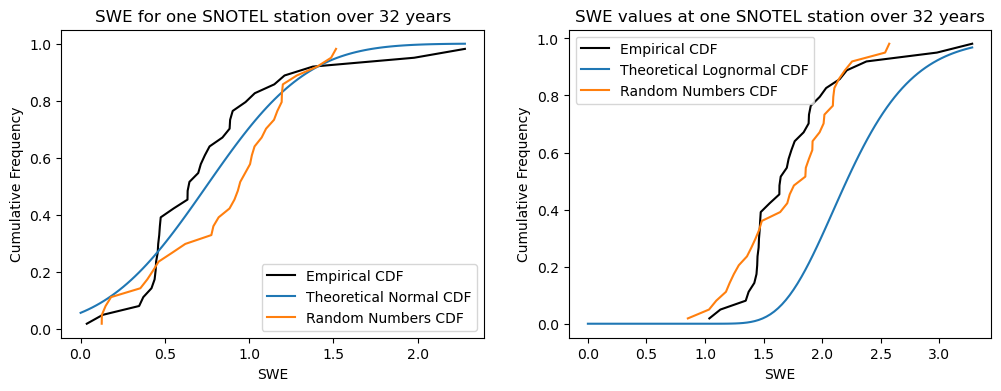

In [130]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Before 1975
# Empirical CDF
ax1.plot(ranked_df['data'], ranked_df['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax1.plot(values_cdf, theoretical_cdf, label='Theoretical Normal CDF')
# Random numbers CDF from a theoretical normal distribution
ax1.plot(random_sorted,random_quantiles,'-', label='Random Numbers CDF')
# Add legend and labels
ax1.legend()
ax1.set_ylabel('Cumulative Frequency')
ax1.set_xlabel('SWE')
ax1.set_title('SWE for one SNOTEL station over 32 years')

# After 1975
# Empirical CDF
ax2.plot(ranked_df['data+1'], ranked_df['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax2.plot(values_cdf_log, theoretical_cdf_log, label='Theoretical Lognormal CDF')
# Random numbers CDF from a theoretical normal distribution
ax2.plot(random_sorted_log, random_quantiles_log,'-', label='Random Numbers CDF')
# Add legend and labels
ax2.legend()
ax2.set_ylabel('Cumulative Frequency')
ax2.set_xlabel('SWE')
ax2.set_title('SWE values at one SNOTEL station over 32 years');

## Repeat with all data (combine with all SNOTEL data):

In [131]:
data = df['station_swe'].values

In [144]:
df_test = pd.DataFrame(data, columns=['data'])
df_test['data+1'] = df_test['data'] + 1

#### Compare the empirical CDF with a theoretical **normal distribution**, and random samples from a normal distribution

In [158]:
# Use the cunnane quantile function for before 1975
ranked_df_norm = cunnane_quantile(df_test,'data+1')

# Create theoretical normal CDF based on our sample values before 1975
values_cdf = np.linspace(0,ranked_df_norm['data+1'].max(),100) # create 100 linearly spaced values between 0 and the maximum in our dataset
theoretical_cdf = stats.norm.cdf(values_cdf,
                                   ranked_df_norm['data+1'].mean(),
                                   ranked_df_norm['data+1'].std(ddof=1))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_normal = np.random.normal(ranked_df_norm['data+1'].mean(),
                                   ranked_df_norm['data+1'].std(ddof=1),
                                   size=ranked_df_norm['data+1'].count())

# Compute the Cunnane plotting position for the random numbers
random_sorted, random_quantiles  = cunnane_quantile_array(random_normal)

#### Compare the empirical CDF with a theoretical **lognormal distribution**, and random samples from a lognormal distribution

In [163]:
# Use the cunnane quantile function for before 1975

ranked_df_log = cunnane_quantile(df_test,'data+1')

# Get the mean and standard deviation of the original data
mu = ranked_df_log['data+1'].mean()
sigma = ranked_df_log['data+1'].std(ddof=1)
# Calculate the "log transformed" mean and standard deviation
mu_log = np.log( mu**2 / np.sqrt(mu**2 + sigma**2) )
sigma_log = np.sqrt( np.log( 1 + sigma**2/mu**2) )

# Create theoretical normal CDF based on our sample values before 1975
values_cdf_log = np.linspace(0,ranked_df_log['data+1'].max(),100) # create 100 linearly spaced values between 0 and the maximum in our dataset
theoretical_cdf_log = stats.lognorm.cdf(values_cdf_log,
                                      sigma_log,
                                      mu_log,
                                      np.exp( mu_log ))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_lognormal = np.random.lognormal(mu_log,
                                         sigma_log,
                                         size=ranked_df_log['data+1'].count())

# Compute the Cunnane plotting position for the random numbers
random_sorted_log, random_quantiles_log  = cunnane_quantile_array(random_lognormal)

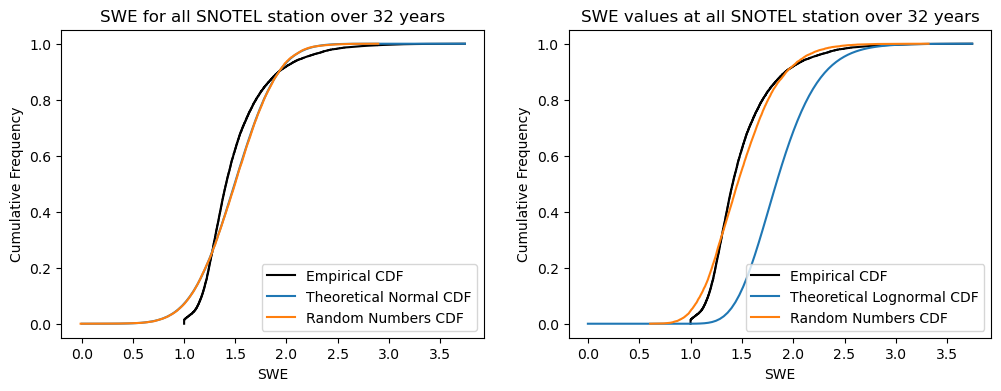

In [164]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Before 1975
# Empirical CDF
ax1.plot(ranked_df_norm['data+1'], ranked_df_norm['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax1.plot(values_cdf, theoretical_cdf, label='Theoretical Normal CDF')
# Random numbers CDF from a theoretical normal distribution
ax1.plot(random_sorted,random_quantiles,'-', label='Random Numbers CDF')
# Add legend and labels
ax1.legend()
ax1.set_ylabel('Cumulative Frequency')
ax1.set_xlabel('SWE')
ax1.set_title('SWE for all SNOTEL station over 32 years')

# After 1975
# Empirical CDF
ax2.plot(ranked_df_log['data+1'], ranked_df_log['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax2.plot(values_cdf_log, theoretical_cdf_log, label='Theoretical Lognormal CDF')
# Random numbers CDF from a theoretical normal distribution
ax2.plot(random_sorted_log, random_quantiles_log,'-', label='Random Numbers CDF')
# Add legend and labels
ax2.legend()
ax2.set_ylabel('Cumulative Frequency')
ax2.set_xlabel('SWE')
ax2.set_title('SWE values at all SNOTEL station over 32 years');

## Test Spatial Patterns within a cluster:

In [402]:
df.columns

Index(['station_n', 'reanalysis_n', 'elevation_m', 'station_swe',
       'station_swe_mean', 'reanalysis_swe', 'deg_days_0C', 'cold_deg_days',
       'cumulative_precip_m', 'precip_mean', 'precip_std', 'precip_n',
       'log_cumulative_precip_m', 'log_reanalysis_swe', 'log_station_swe',
       'log_precip_mean', 'log_station_swe_mean', 'log_reanalysis_swe_mean',
       'log_precip_std', 'log_station_swe_std', 'log_reanalysis_swe_std',
       'log_precip_n', 'log_station_n', 'log_reanalysis_n', 'latitude',
       'longitude', 'geometry', 'cluster'],
      dtype='object')

In [4]:
ucrb = gpd.read_file('../data/huc2.geojson')

In [5]:
ucrb['huc2'] = ucrb['huc2'].astype('int')

In [409]:
ucrb

huc2     areaacres   areasqkm  \
0     9  7.368587e+05    2981.97   
1    10  1.521878e+08  615882.85   
2    11  3.276798e+07  132607.43   
3    12  5.459801e+06   22095.06   
4    13  5.691493e+07  230326.85   
5    14  7.254242e+07  293569.06   
6    15  9.350180e+07  378388.72   
7    16  9.069970e+07  367048.98   
8    17  1.822409e+08  737503.26   
9    18  1.072632e+08  434079.25   

                                              states  \
0               MTMTCN,MTCN,MTCN,MTCN,MTCN,MTMTCN,MT   
1  MTCOCOCOCOCOCOMTMTMTCOMTMTMTMTMTMTMTMTMTMTMTMT...   
2  NM,TXNM,TXNM,TXCO,NMCO,NMNM,OKNM,TXCO,NM,OKCO,...   
3  NM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXN...   
4  MX,NMNM,TXNM,TXNM,TXNM,TXNM,TXMX,NMMX,NMMX,NMM...   
5  COCOCOWYAZ,NMAZ,NMCO,NMCO,NMCO,NMCO,NMCO,NMCO,...   
6  AZAZ,MXAZ,MXAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZNVNV...   
7  NVNVNVNVNVNVNVNVNVNVCA,NVNVNVNV,UTNV,UTNV,UTNV...   
8  ORORIDWAORORORORORORORORID,ORIDIDIDIDWAWAWAIDI...   
9  CACACA,MXCA,MXCACACACACACACACACACACACACACACACA...   

                                               huc10  \
0  0904000101090400010209040002010904000103090400...   
1  1004020102101900030910190003101019000311101900...   
2  1112010103110901010311120101021104000103110800...   
3  1205000202120500050112080001021208000307120800...   
4  1303020109130500040913050004171307000101130700...   
5  1401000107140100011014010003021404010108140801...   
6  1505030203150801030615050301051506010503150601...   
7  1604010705160401070116040107021604010704160401...   
8  1705010807170703060217040214041706010904170701...   
9  1806000901180902080518070305051807030513180400...   

                                                name  \
0  Headwaters Saint Mary RiverSwiftcurrent CreekH...   
1  South Fork Musselshell RiverLost CreekSanborn ...   
2  Frio DrawArroyo TrujilloOutlet Tierra Blanca C...   
3  Headwaters Blackwater DrawRunning Water DrawSu...   
4  Simpson DrawNorth DrawLinda LakeRed Bluff Rese...   
5  Muddy CreekRock CreekUpper Eagle RiverMuddy Cr...   
6  Tanque Verde Creek-Rillito RiverTule DesertJos...   
7  Antelope CreekHeadwaters Reese RiverCottonwood...   
8  Lower Cow CreekWillow CreekLower Beaver CreekL...   
9  San Antonio CreekUpper Fremont WashArroyo Seco...   

                                            geometry  
0  POLYGON ((-113.46394 48.61630, -113.46407 48.6...  
1  POLYGON ((-111.87005 44.56395, -111.87022 44.5...  
2  POLYGON ((-104.67753 35.22997, -104.67807 35.2...  
3  POLYGON ((-103.06480 32.69076, -103.06486 32.6...  
4  POLYGON ((-108.75655 31.33269, -108.75660 31.3...  
5  POLYGON ((-110.93089 36.58755, -110.93103 36.5...  
6  POLYGON ((-114.80074 32.49040, -114.81362 32.4...  
7  POLYGON ((-119.08154 38.21990, -119.08087 38.2...  
8  MULTIPOLYGON (((-124.42555 42.35187, -124.4240...  
9  MULTIPOLYGON (((-123.01153 38.00344, -122.9924...

In [6]:
ucrb = ucrb[ucrb['huc2']==14]

In [411]:
ucrb

huc2    areaacres   areasqkm  \
5    14  72542420.79  293569.06   

                                              states  \
5  COCOCOWYAZ,NMAZ,NMCO,NMCO,NMCO,NMCO,NMCO,NMCO,...   

                                               huc10  \
5  1401000107140100011014010003021404010108140801...   

                                                name  \
5  Muddy CreekRock CreekUpper Eagle RiverMuddy Cr...   

                                            geometry  
5  POLYGON ((-110.93089 36.58755, -110.93103 36.5...

In [7]:
ucrb = ucrb.to_crs('epsg:4326')

In [8]:
df_ucrb = df.clip(ucrb)

<Axes: >

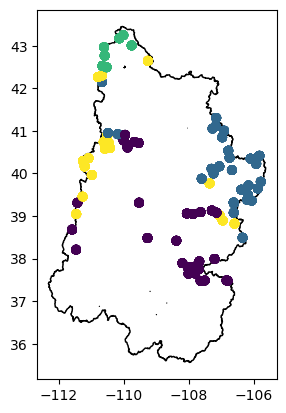

In [416]:
fig, ax = plt.subplots()

ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
df_ucrb.plot(ax=ax, column='cluster')

<Axes: >

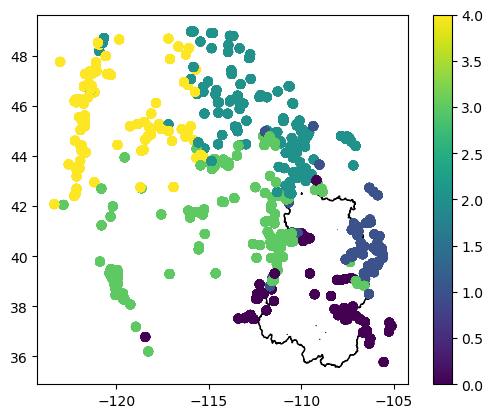

In [418]:
fig, ax = plt.subplots()

ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
df.plot(ax=ax, column='cluster', legend=True)

<Axes: >

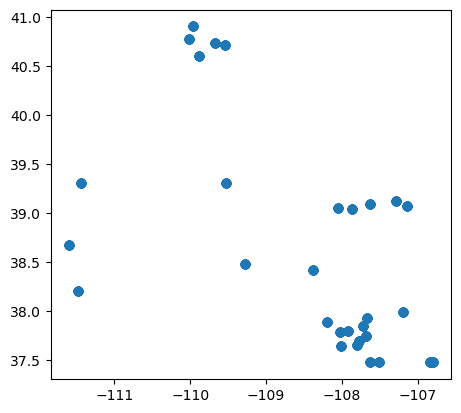

In [420]:
df_ucrb[df_ucrb['cluster']==0].plot()

In [436]:
len(df_ucrb[df_ucrb['cluster']==0]) / 32

30.0

In [427]:
df_ucrb

station_n  reanalysis_n  elevation_m  station_swe  \
station     year                                                      
874_CO_SNTL 1990  -1.158316     -1.363052  3352.800049      0.48260   
            1991   0.836619     -0.920469  3352.800049      0.94234   
            2021   0.241445     -0.812500  3352.800049      0.80518   
            2020  -0.166359     -0.344040  3352.800049      0.71120   
            2019   1.861640      0.944449  3352.800049      1.17856   
...                     ...           ...          ...          ...   
555_WY_SNTL 1995  -0.274240     -0.375197  2359.152100      0.28702   
            1994  -0.554315     -0.556152  2359.152100      0.25654   
            1993  -0.227561      0.618156  2359.152100      0.29210   
            1992  -1.487899     -1.163552  2359.152100      0.15494   
            1991  -0.390938     -0.458715  2359.152100      0.27432   

                  station_swe_mean  reanalysis_swe  deg_days_0C  \
station     year                                                  
874_CO_SNTL 1990          0.749538          0.3130         12.0   
            1991          0.749538          0.4122          2.0   
            2021          0.749538          0.4364          6.0   
            2020          0.749538          0.5414         10.0   
            2019          0.749538          0.8302          2.0   
...                            ...             ...          ...   
555_WY_SNTL 1995          0.316865          0.2436          2.0   
            1994          0.316865          0.2150          2.0   
            1993          0.316865          0.4006          5.0   
            1992          0.316865          0.1190          0.0   
            1991          0.316865          0.2304          0.0   

                  cold_deg_days  cumulative_precip_m  precip_mean  ...  \
station     year                                                   ...   
874_CO_SNTL 1990            0.0             0.250970     0.286080  ...   
            1991            0.0             0.358043     0.286080  ...   
            2021            0.0             0.255747     0.286080  ...   
            2020            0.0             0.299887     0.286080  ...   
            2019            0.0             0.423093     0.286080  ...   
...                         ...                  ...          ...  ...   
555_WY_SNTL 1995            0.0             0.326875     0.305987  ...   
            1994            0.0             0.240545     0.305987  ...   
            1993            0.0             0.334753     0.305987  ...   
            1992            1.0             0.191015     0.305987  ...   
            1991            1.0             0.240227     0.305987  ...   

                  log_precip_std  log_station_swe_std  log_reanalysis_swe_std  \
station     year                                                                
874_CO_SNTL 1990        0.314287             0.339562                0.373401   
            1991        0.314287             0.339562                0.373401   
            2021        0.314287             0.339562                0.373401   
            2020        0.314287             0.339562                0.373401   
            2019        0.314287             0.339562                0.373401   
...                          ...                  ...                     ...   
555_WY_SNTL 1995        0.270338             0.336051                0.518697   
            1994        0.270338             0.336051                0.518697   
            1993        0.270338             0.336051                0.518697   
            1992        0.270338             0.336051                0.518697   
            1991        0.270338             0.336051                0.518697   

                  log_precip_n  log_station_n  log_reanalysis_n   latitude  \
station     year                                                             
874_CO_SNTL 1990     -0.264459      -1.143926    

In [434]:
len(df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==0)]['station_n'].values)

30

In [437]:
pearsons_cc = np.corrcoef(df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==0)]['station_n'].values)

In [438]:
pearsons_cc

1.0

In [36]:
reshaped_df = df[df['cluster']==0]['station_n'].unstack(level=0)

In [37]:
reshaped_df

station  316_NM_SNTL  327_CO_SNTL  339_UT_SNTL  348_UT_SNTL  364_UT_SNTL  \
year                                                                       
1990       -0.447354    -0.828297    -1.207037    -0.752704    -0.601298   
1991        1.356706     0.481861    -0.145419    -0.691102    -0.262240   
1992        1.637859    -0.641132    -0.092339    -0.537096    -0.177476   
1993        1.591000     0.971371     1.517781     2.881837     1.687342   
1994        0.841260    -0.540350    -1.030100    -0.875909    -0.347004   
1995        1.637859     1.388894     0.898504     1.002964     1.115182   
1996       -0.236490    -0.425172    -0.269275     0.171332     0.670169   
1997        0.208668     2.195145     0.739262     0.325338     0.267538   
1998       -0.002197    -0.166019     1.075440    -0.598698     1.072800   
1999       -1.197094    -0.885886    -0.888551    -1.615138    -0.643680   
2000       -0.423925     0.121927    -0.570066    -0.013476     0.140391   
2001       -0.142773     0.884987    -0.463905    -0.229084     0.203964   
2002       -1.267382    -1.620151    -1.684764    -0.660301    -0.347004   
2003        0.232097    -0.727516    -0.410824    -0.044277     0.267538   
2004       -0.845653    -0.065238    -0.446211    -0.999114     0.013244   
2005        1.052125     2.324721     1.924734     1.002964     2.026399   
2006       -0.869083    -0.727516     0.049210     0.633350     0.648978   
2007       -0.142773    -0.914681    -0.906245    -2.046355    -0.749635   
2008        1.286418     0.985768     0.226147     0.848958     0.818506   
2009        0.466391     0.179517     0.739262    -0.290686     0.543022   
2010        0.419532     0.035543     0.668487     0.694952     0.988035   
2011       -1.712540     0.165120     1.907040     1.249374     2.047591   
2012       -1.407958    -1.346601    -0.923939    -1.399529    -1.003929   
2013       -0.611360    -0.857092    -0.410824    -0.629500    -0.474151   
2014       -1.173664    -0.166019    -0.410824     0.140530    -1.194649   
2015       -0.775365    -1.346601    -1.366279    -0.875909    -1.660853   
2016       -0.751936    -0.079635     0.155372     0.725753    -0.219858   
2017        1.169271     0.697821     1.447006     0.540946    -1.385368   
2018       -1.478246    -1.130641    -1.330892    -0.691102    -2.211822   
2019        1.333277     1.921595     1.871653     1.557386     0.394684   
2020        0.372673     0.251504    -0.056951     0.602548    -0.749635   
2021       -0.119343    -0.137225    -0.605454     0.571747    -0.876782   

station  386_CO_SNTL  390_UT_SNTL  394_NM_SNTL  396_UT_SNTL  409_CO_SNTL  ...  \
year                                                                      ...   
1990       -0.965994    -0.931263    -0.645069     0.642324    -1.085041  ...   
1991        1.095867    -0.287376     1.349249     0.111254     1.016289  ...   
1992        0.193803     0.439061     1.164209    -0.459154     0.508585  ...   
1993        2.078473     2.403742     1.966048     0.917693     2.497092  ...   
1994        0.000503    -0.518515     0.239010    -0.675515    -0.492720  ...   
1995        0.709268     1.396637     0.629649     1.468432     0.875260  ...   
1996        0.338778    -0.287376    -0.994589    -0.282131    -0.577337  ...   
1997        0.209911    -0.138787     0.280130     0.484970     0.353454  ...   
1998        0.145478     0.455571     0.053970     0.445631     0.085499  ...   
1999       -1.417026    -0.881733    -1.302989    -0.419815    -1.888905  ...   
2000        0.548185    -0.105767    -0.192750    -0.518161     0.409865  ...   
2001        0.113261     0.158392     0.629649    -0.223123    -0.182456  ...   
2002       -1.384810    -1.327501    -1.138509    -0.616508    -1.000423  ...   
2003       -0.241121    -0.716634     0.177330    -0.754192     0.198322  ...   
2004       -0.917669    -0.617574    -1.179629    -0.695185    -0.972218  ...   
2005        1.305275     2.849510     

In [40]:
cluster0_corr = np.corrcoef(reshaped_df)

In [41]:
cluster0_corr

array([[ 1.        , -0.12655147, -0.0399228 , ..., -0.38549574,
         0.26354375, -0.0150172 ],
       [-0.12655147,  1.        ,  0.25052637, ...,  0.20131831,
        -0.15939572,  0.22684585],
       [-0.0399228 ,  0.25052637,  1.        , ..., -0.02473567,
         0.19660095,  0.27402422],
       ...,
       [-0.38549574,  0.20131831, -0.02473567, ...,  1.        ,
         0.14999194,  0.27197349],
       [ 0.26354375, -0.15939572,  0.19660095, ...,  0.14999194,
         1.        ,  0.47224259],
       [-0.0150172 ,  0.22684585,  0.27402422, ...,  0.27197349,
         0.47224259,  1.        ]])

In [9]:
import statistics

In [440]:
statistics.variance(df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==0)]['station_n'].values)

0.37893747088494323

In [43]:
df_ucrb['dif_from_mean'] = np.nan

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [44]:
df_ucrb_0 = df_ucrb[df_ucrb['cluster']==0]
df_ucrb_1 = df_ucrb[df_ucrb['cluster']==1]
df_ucrb_2 = df_ucrb[df_ucrb['cluster']==2]
df_ucrb_3 = df_ucrb[df_ucrb['cluster']==3]

In [45]:
for site, year in zip(df_ucrb_0.index.get_level_values(0), df_ucrb_0.index.get_level_values(1)):
    df_ucrb_0.loc[pd.IndexSlice[site,year],'dif_from_mean'] = df_ucrb_0.loc[pd.IndexSlice[site,year],'station_n'] - df_ucrb_0.loc[pd.IndexSlice[:,year],'station_n'].mean()

for site, year in zip(df_ucrb_1.index.get_level_values(0), df_ucrb_1.index.get_level_values(1)):
    df_ucrb_1.loc[pd.IndexSlice[site,year],'dif_from_mean'] = df_ucrb_1.loc[pd.IndexSlice[site,year],'station_n'] - df_ucrb_1.loc[pd.IndexSlice[:,year],'station_n'].mean()

for site, year in zip(df_ucrb_2.index.get_level_values(0), df_ucrb_2.index.get_level_values(1)):
    df_ucrb_2.loc[pd.IndexSlice[site,year],'dif_from_mean'] = df_ucrb_2.loc[pd.IndexSlice[site,year],'station_n'] - df_ucrb_2.loc[pd.IndexSlice[:,year],'station_n'].mean()

for site, year in zip(df_ucrb_3.index.get_level_values(0), df_ucrb_3.index.get_level_values(1)):
    df_ucrb_3.loc[pd.IndexSlice[site,year],'dif_from_mean'] = df_ucrb_3.loc[pd.IndexSlice[site,year],'station_n'] - df_ucrb_3.loc[pd.IndexSlice[:,year],'station_n'].mean()

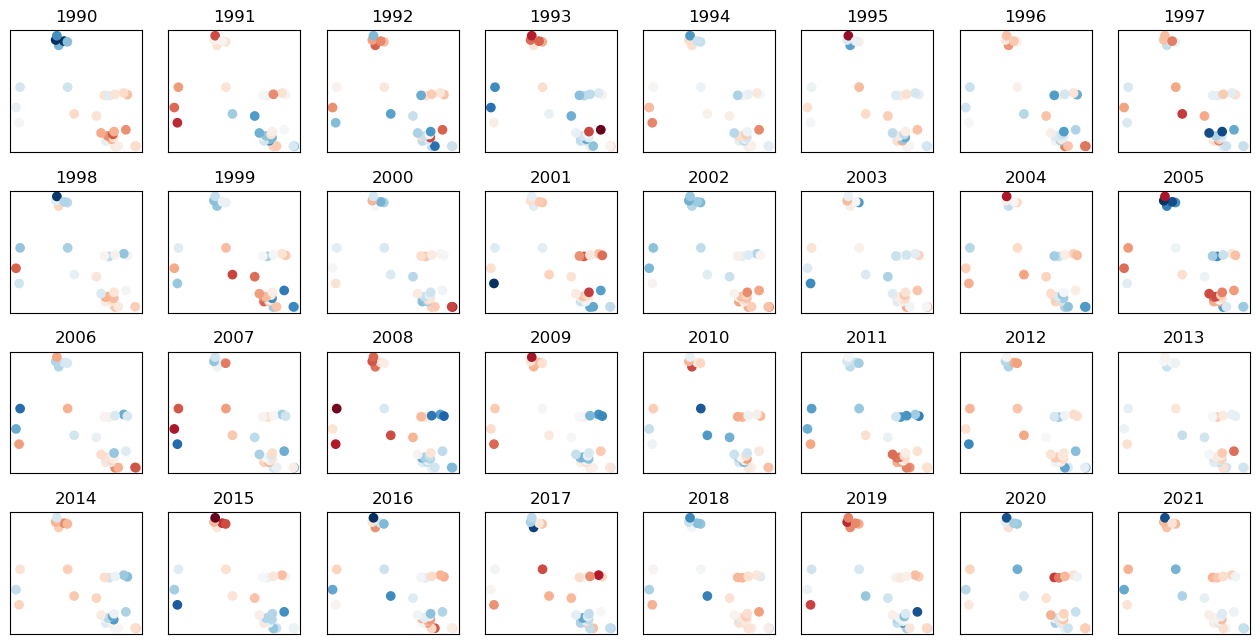

In [477]:
fig, axes = plt.subplots(4,8, figsize=(16,8))

for ax, year in zip(axes.ravel(), np.arange(1990,2022)):
    df_ucrb_0[df_ucrb_0.index.get_level_values(1)==year].plot(ax=ax, column='dif_from_mean', cmap='RdBu', legend=False, vmin=-1.5, vmax=1.5)
    #ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
    ax.set_title(f'{year}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

<Axes: >

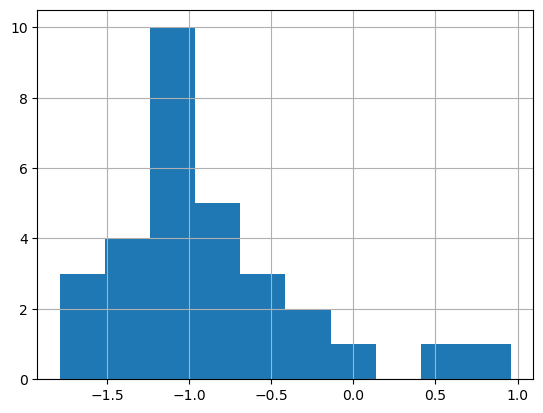

In [479]:
df_ucrb_0[df_ucrb_0.index.get_level_values(1)==1990]['station_n'].hist()

In [480]:
normal_stats_yr = []
normal_pvalue_yr = []

for year in df_ucrb_0.index.get_level_values(1).unique():
    shapiro = stats.shapiro(df_ucrb_0.loc[pd.IndexSlice[:, year],'station_n'])
    normal_stats_yr.append(shapiro)
    normal_pvalue_yr.append(shapiro[1])

In [481]:
norm = [x for x in normal_pvalue_yr if x > 0.05]
not_norm = [x for x in normal_pvalue_yr if x <= 0.05]

In [482]:
len(norm) / len(normal_pvalue_yr)

0.875

In [483]:
len(normal_pvalue_yr)

32

In [484]:
df_ucrb_0[df_ucrb_0.index.get_level_values(1)==year]['station_n'].values

array([-2.15027191, -1.86247239, -1.70319483, -1.9219935 , -1.38480969,
       -1.61973757, -1.7671921 , -1.77691359, -1.35403365, -1.78777241,
       -1.66412705, -1.39098902, -2.03907344, -1.00042333, -1.9278171 ,
       -1.16207423, -1.21950783, -1.41802719, -0.89401333, -1.36784616,
       -1.13375822, -0.95688216, -0.6686716 , -1.38991191, -0.6603007 ,
       -0.71767138, -0.90226084, -0.79451695, -0.61650767, -0.77190638])

In [52]:
from scipy.linalg import svd

In [491]:
df_ucrb_0['station_n']

station      year
874_CO_SNTL  1990   -1.158316
             1991    0.836619
             2021    0.241445
             2020   -0.166359
             2019    1.861640
                       ...   
833_UT_SNTL  1992   -0.564431
             1994   -0.075497
             1995    1.362543
             1996   -0.535670
             1991    0.125828
Name: station_n, Length: 960, dtype: float64

In [494]:
new_df = df_ucrb_0['station_n'].unstack(level=1)

In [505]:
U, S, V = svd(new_df.values,full_matrices=False)

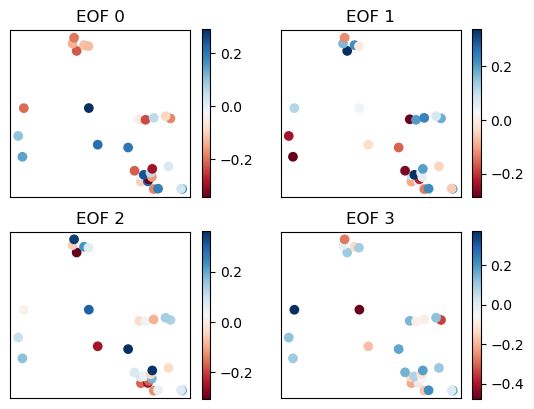

In [513]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_0[df_ucrb_0.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [517]:
new_df = df_ucrb_0['dif_from_mean'].unstack(level=1)

In [518]:
U, S, V = svd(new_df.values,full_matrices=False)

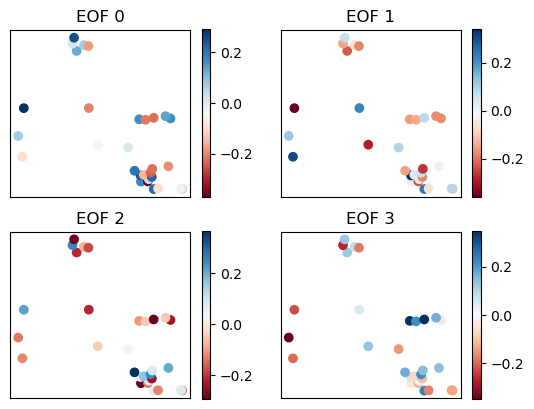

In [516]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_0[df_ucrb_0.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [519]:
var_exp = S / np.sum(S)

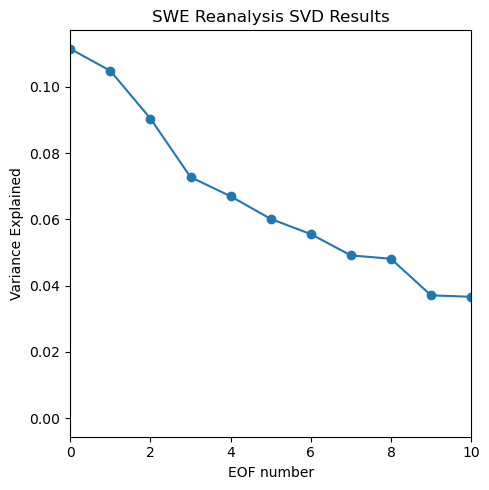

In [520]:
plt.figure(figsize=(5,5))
plt.plot(var_exp,'-o')
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
#plt.title('SVD Variance Explained')
#plt.ylim([0,0.16])
plt.xlim([0,10])
plt.title('SWE Reanalysis SVD Results')
plt.tight_layout()

### Cluster 1

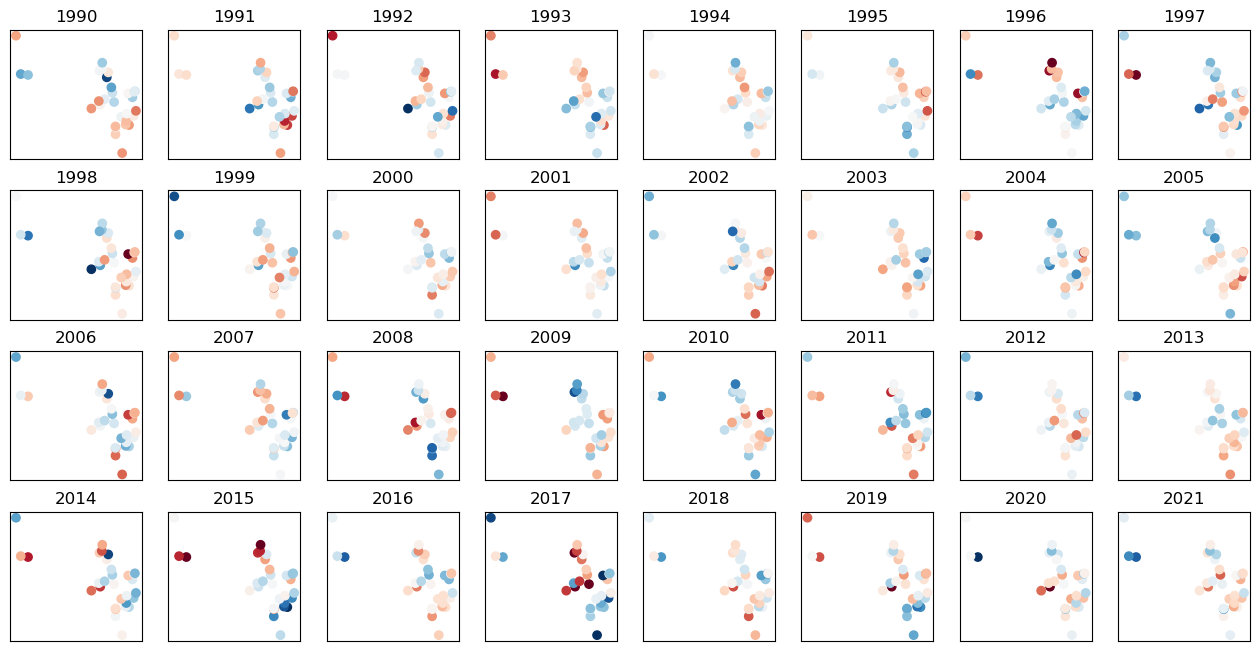

In [46]:
fig, axes = plt.subplots(4,8, figsize=(16,8))

for ax, year in zip(axes.ravel(), np.arange(1990,2022)):
    df_ucrb_1[df_ucrb_1.index.get_level_values(1)==year].plot(ax=ax, column='dif_from_mean', cmap='RdBu', legend=False, vmin=-1.5, vmax=1.5)
    #ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
    ax.set_title(f'{year}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [47]:
normal_stats_yr = []
normal_pvalue_yr = []

for year in df_ucrb_1.index.get_level_values(1).unique():
    shapiro = stats.shapiro(df_ucrb_1.loc[pd.IndexSlice[:, year],'station_n'])
    normal_stats_yr.append(shapiro)
    normal_pvalue_yr.append(shapiro[1])

In [48]:
norm = [x for x in normal_pvalue_yr if x > 0.05]
not_norm = [x for x in normal_pvalue_yr if x <= 0.05]

In [49]:
len(norm) / len(normal_pvalue_yr)

0.96875

In [50]:
new_df = df_ucrb_1['station_n'].unstack(level=1)

In [53]:
U, S, V = svd(new_df.values,full_matrices=False)

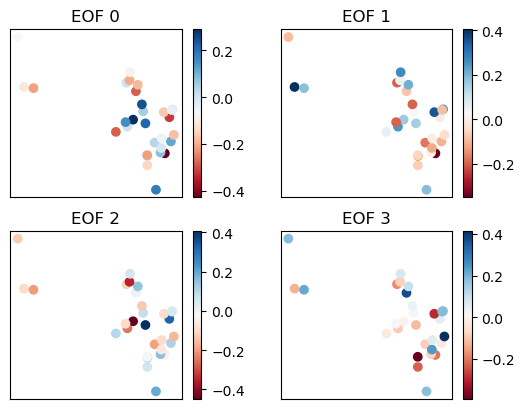

In [54]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_1[df_ucrb_1.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [55]:
new_df = df_ucrb_1['dif_from_mean'].unstack(level=1)

In [56]:
U, S, V = svd(new_df.values,full_matrices=False)

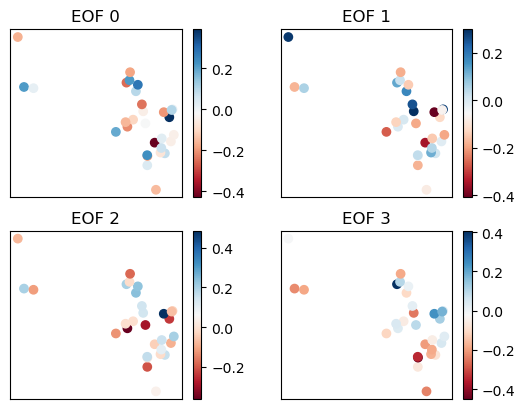

In [57]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_1[df_ucrb_1.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [58]:
var_exp = S / np.sum(S)

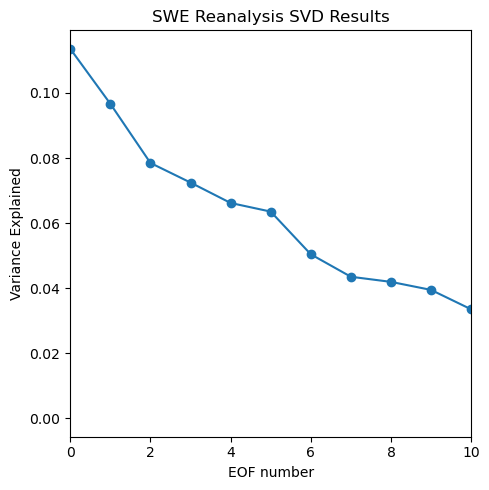

In [59]:
plt.figure(figsize=(5,5))
plt.plot(var_exp,'-o')
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
#plt.title('SVD Variance Explained')
#plt.ylim([0,0.16])
plt.xlim([0,10])
plt.title('SWE Reanalysis SVD Results')
plt.tight_layout()

## Cluster 2

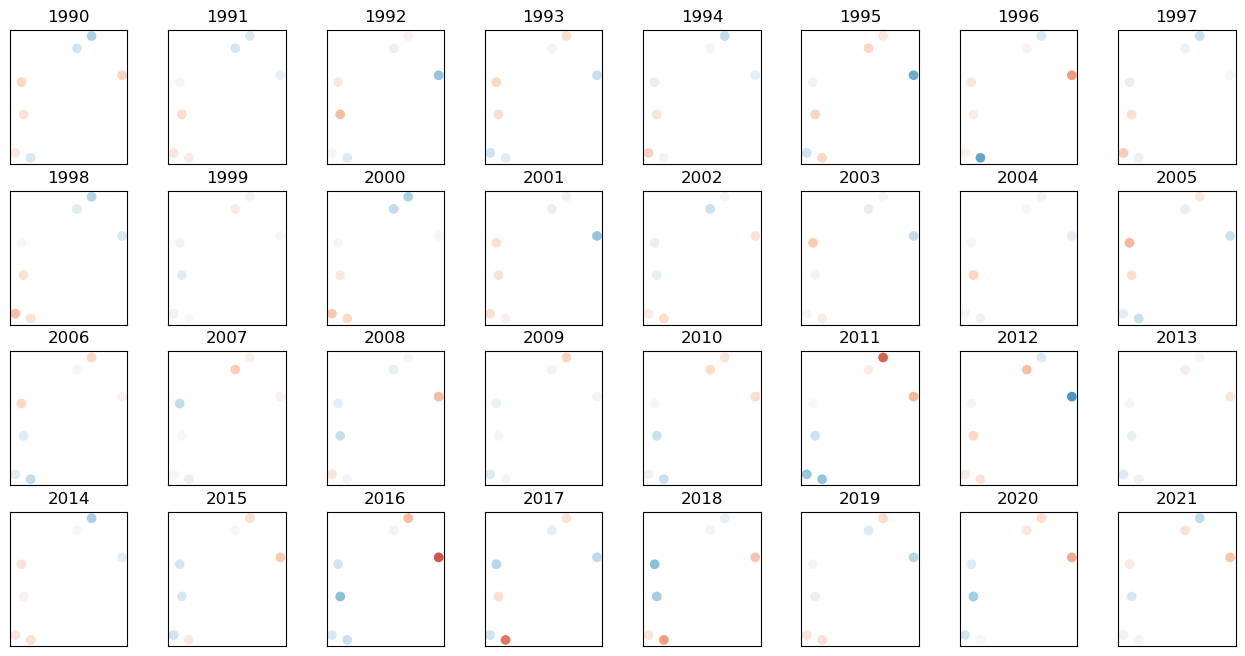

In [60]:
fig, axes = plt.subplots(4,8, figsize=(16,8))

for ax, year in zip(axes.ravel(), np.arange(1990,2022)):
    df_ucrb_2[df_ucrb_2.index.get_level_values(1)==year].plot(ax=ax, column='dif_from_mean', cmap='RdBu', legend=False, vmin=-1.5, vmax=1.5)
    #ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
    ax.set_title(f'{year}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [62]:
normal_stats_yr = []
normal_pvalue_yr = []

for year in df_ucrb_2.index.get_level_values(1).unique():
    shapiro = stats.shapiro(df_ucrb_2.loc[pd.IndexSlice[:, year],'station_n'])
    normal_stats_yr.append(shapiro)
    normal_pvalue_yr.append(shapiro[1])

In [63]:
norm = [x for x in normal_pvalue_yr if x > 0.05]
not_norm = [x for x in normal_pvalue_yr if x <= 0.05]

In [64]:
len(norm) / len(normal_pvalue_yr)

0.96875

In [65]:
new_df = df_ucrb_2['station_n'].unstack(level=1)

In [66]:
U, S, V = svd(new_df.values,full_matrices=False)

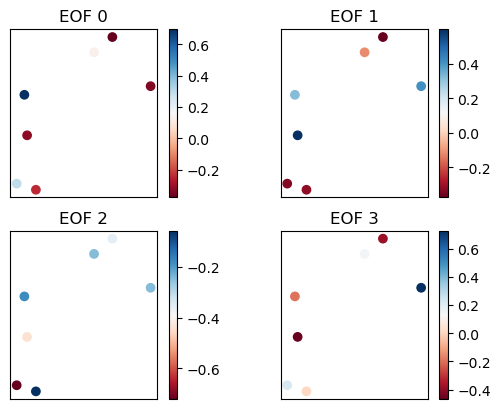

In [67]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_2[df_ucrb_2.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [68]:
new_df = df_ucrb_2['dif_from_mean'].unstack(level=1)

In [69]:
U, S, V = svd(new_df.values,full_matrices=False)

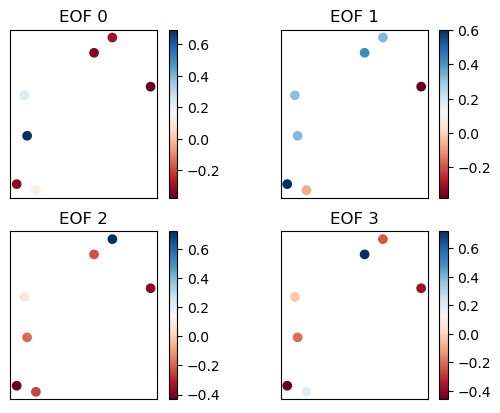

In [70]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_2[df_ucrb_2.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [71]:
var_exp = S / np.sum(S)

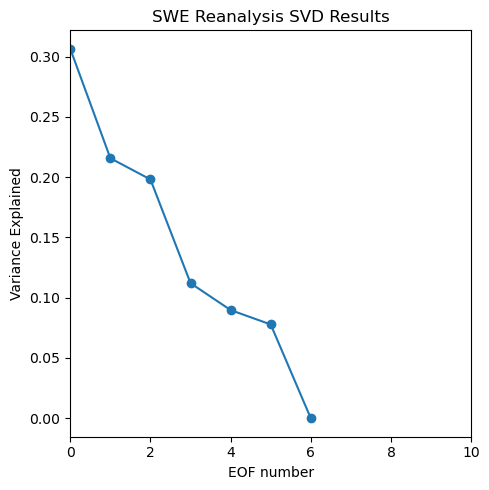

In [72]:
plt.figure(figsize=(5,5))
plt.plot(var_exp,'-o')
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
#plt.title('SVD Variance Explained')
#plt.ylim([0,0.16])
plt.xlim([0,10])
plt.title('SWE Reanalysis SVD Results')
plt.tight_layout()

## Cluster 3

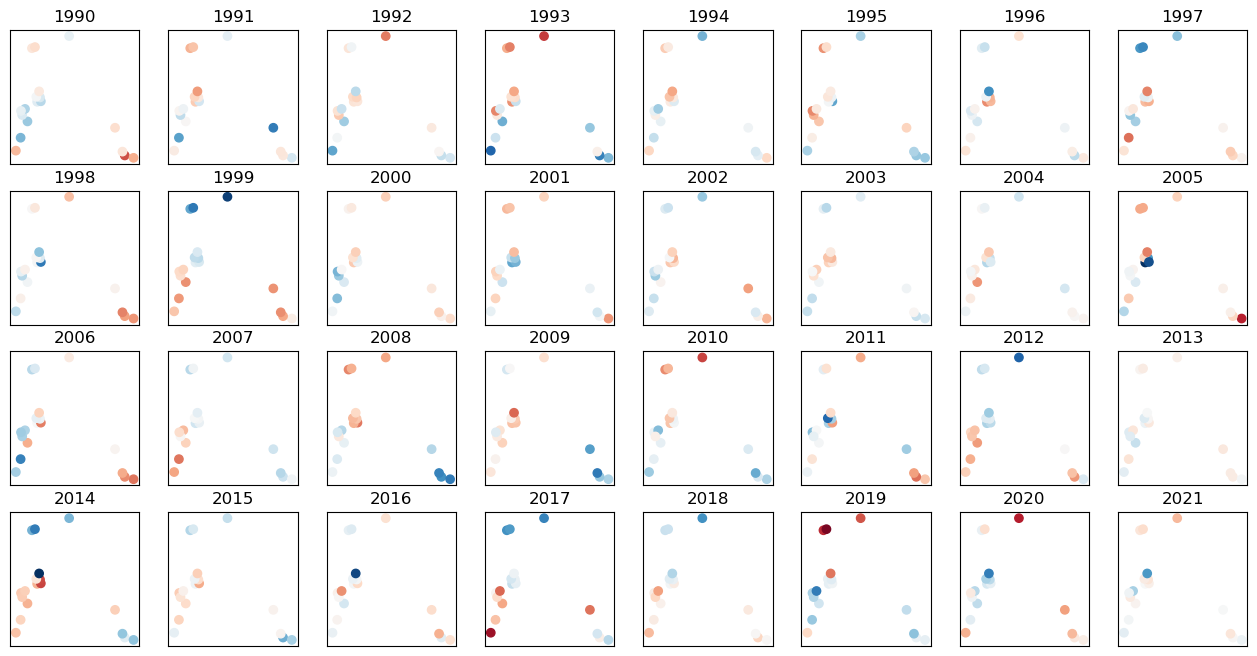

In [73]:
fig, axes = plt.subplots(4,8, figsize=(16,8))

for ax, year in zip(axes.ravel(), np.arange(1990,2022)):
    df_ucrb_3[df_ucrb_3.index.get_level_values(1)==year].plot(ax=ax, column='dif_from_mean', cmap='RdBu', legend=False, vmin=-1.5, vmax=1.5)
    #ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
    ax.set_title(f'{year}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [74]:
normal_stats_yr = []
normal_pvalue_yr = []

for year in df_ucrb_3.index.get_level_values(1).unique():
    shapiro = stats.shapiro(df_ucrb_3.loc[pd.IndexSlice[:, year],'station_n'])
    normal_stats_yr.append(shapiro)
    normal_pvalue_yr.append(shapiro[1])

In [75]:
norm = [x for x in normal_pvalue_yr if x > 0.05]
not_norm = [x for x in normal_pvalue_yr if x <= 0.05]

In [76]:
len(norm) / len(normal_pvalue_yr)

0.90625

In [77]:
new_df = df_ucrb_3['station_n'].unstack(level=1)

In [78]:
U, S, V = svd(new_df.values,full_matrices=False)

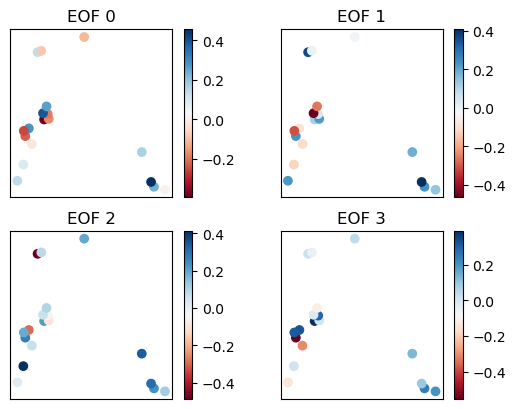

In [79]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_3[df_ucrb_3.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [80]:
new_df = df_ucrb_3['dif_from_mean'].unstack(level=1)

In [81]:
U, S, V = svd(new_df.values,full_matrices=False)

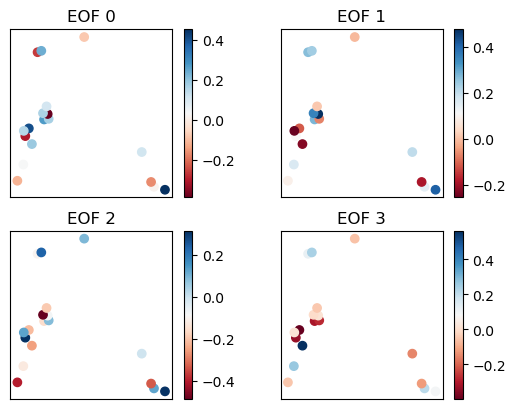

In [82]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_3[df_ucrb_3.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [83]:
var_exp = S / np.sum(S)

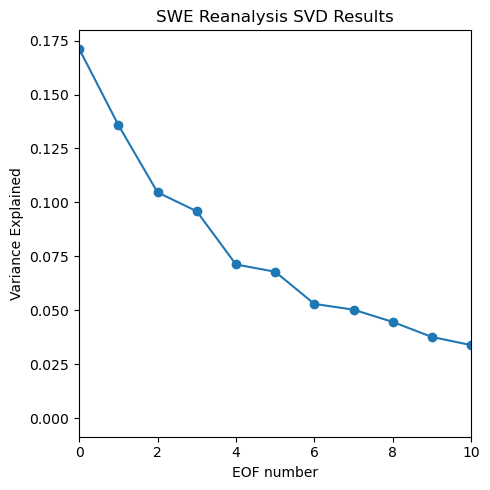

In [84]:
plt.figure(figsize=(5,5))
plt.plot(var_exp,'-o')
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
#plt.title('SVD Variance Explained')
#plt.ylim([0,0.16])
plt.xlim([0,10])
plt.title('SWE Reanalysis SVD Results')
plt.tight_layout()

### Permutation test of the mean between the clusters for each year:

In [522]:
df_ucrb[df_ucrb.index.get_level_values(1)==1990].groupby('cluster')

In [529]:
cluster_data = []

for cluster in df_ucrb['cluster'].unique():
    cluster_data.append(df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==cluster)]['station_n'].values)

In [530]:
cluster_data

[array([-1.15831562, -1.00638688, -0.9628301 , -0.71716175, -0.96599411,
        -1.37982934, -1.12977536, -0.73397314, -1.54038336, -1.08545434,
        -1.78716787, -1.39707536, -1.42700168, -1.08504064, -1.54093476,
        -1.16207423, -1.08780168, -1.31288039, -1.14231958, -0.68317978,
        -1.0637191 , -0.54668208, -0.82963734, -0.7527043 , -0.58673931,
        -0.16625782,  0.95989152,  0.64232354,  0.06339328, -0.23459362]),
 array([-1.08604953, -0.77656823, -0.34920171, -1.06545113, -0.8504455 ,
        -0.88937483, -0.54775885, -0.4251877 , -0.47392733, -0.89409382,
        -1.21694892, -0.47274188,  0.01828233,  0.09754838, -0.45151071,
        -0.26294234, -0.09304281, -1.01960739,  0.35233629,  0.19007099,
        -0.12275711, -0.25615443,  0.38107919, -1.10617258, -0.36888071,
         0.95201137, -0.59317222, -0.38453865, -1.08852256,  0.12054975]),
 array([-1.50317759, -1.0795974 , -0.71876754, -0.7939827 , -1.02415155,
         0.14973114,  0.02032742, -0.31891734, 

In [537]:
def statistic(x, y):

    return np.mean(x) - np.mean(y)

In [540]:
from scipy.stats import permutation_test
res = permutation_test((df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==0)]['station_n'].values, df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==1)]['station_n'].values), statistic, alternative='two-sided', n_resamples=9999)

print(res.statistic)

print(res.pvalue)

-0.4379044192209472
0.0048


In [544]:
for x in np.arange(0,4):
    for y in np.arange(0,4):
        res = permutation_test((df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==x)]['station_n'].values, df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==y)]['station_n'].values), statistic, alternative='two-sided', n_resamples=9999)

        #print(res.statistic)
        
        print(res.pvalue)
            

0.9796
0.005
0.2568
0.0554
0.0056
0.9974
0.4476
0.4386
0.2624
0.4618
1.0
0.7878
0.0562
0.4438
0.7896
0.994


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [28]:
df_reset = df.reset_index()

In [34]:
model = ols(formula='station_n ~ cluster', data=df_reset[df_reset['year']==1990].dropna()).fit()

# call statsmodels stats.anova_lm and pass model as an argument to perform ANOVA
anova_result = sm.stats.anova_lm(model, type=2)

print(anova_result)

             df      sum_sq   mean_sq         F    PR(>F)
cluster     1.0    1.280203  1.280203  2.760227  0.097708
Residual  292.0  135.430627  0.463804       NaN       NaN


In [33]:
df_reset

station  year  station_n  reanalysis_n  elevation_m  station_swe  \
0      301_CA_SNTL  1990  -0.492262     -0.194751  1886.712036     0.193040   
1      301_CA_SNTL  1991  -0.806681      0.193222  1886.712036     0.142240   
2      301_CA_SNTL  1992  -1.639892     -1.097426  1886.712036     0.007620   
3      301_CA_SNTL  1993   0.938344     -0.578276  1886.712036     0.424180   
4      301_CA_SNTL  1994  -0.335053     -0.422643  1886.712036     0.218440   
...            ...   ...        ...           ...          ...          ...   
14235          BLD  2017   0.619445      1.160298  2194.560000     1.033272   
14236          BLD  2018  -0.806206     -1.171988  2194.560000     0.371856   
14237          BLD  2019   0.501188      1.293572  2194.560000     0.978408   
14238          BLD  2020  -0.615681     -0.258835  2194.560000     0.460248   
14239          BLD  2021  -0.418586     -0.760679  2194.560000     0.551688   

       station_swe_mean  reanalysis_swe  deg_days_0C  cold_deg_days  ...  \
0              0.272574          0.1718         57.0            0.0  ...   
1              0.272574          0.2416         47.0            0.0  ...   
2              0.272574          0.0094         64.0            0.0  ...   
3              0.272574          0.1028         42.0            0.0  ...   
4              0.272574          0.1308         48.0            0.0  ...   
...                 ...             ...          ...            ...  ...   
14235          0.745887          1.1946         54.0            0.0  ...   
14236          0.745887          0.1796         82.0            0.0  ...   
14237          0.745887          1.2526         59.0            0.0  ...   
14238          0.745887          0.5770         68.0            0.0  ...   
14239          0.745887          0.3586         55.0            0.0  ...   

       log_precip_std  log_station_swe_std  log_reanalysis_swe_std  \
0            0.319384                  NaN                     NaN   
1            0.319384                  NaN                     NaN   
2            0.319384                  NaN                     NaN   
3            0.319384                  NaN                     NaN   
4            0.319384                  NaN                     NaN   
...               ...                  ...                     ...   
14235        0.376676             0.751098                     NaN   
14236        0.376676             0.751098                     NaN   
14237        0.376676             0.751098                     NaN   
14238        0.376676             0.751098                     NaN   
14239        0.376676             0.751098                     NaN   

       log_precip_n  log_station_n  log_reanalysis_n   latitude   longitude  \
0         -1.079449            NaN               NaN  41.235828 -120.791924   
1         -0.898522            NaN               NaN  41.235828 -120.791924   
2         -1.476953            NaN               NaN  41.235828 -120.791924   
3          1.103428            NaN               NaN  41.235828 -120.791924   
4         -1.081188            NaN               NaN  41.235828 -120.791924   
...             ...            ...               ...        ...         ...   
14235      2.070124       0.712421               NaN  38.451256 -120.034882   
14236      0.060523      -0.648226               NaN  38.451256 -120.034882   
14237      1.449251       0.639782               NaN  38.451256 -120.034882   
14238     -0.428631      -0.364297               NaN  38.451256 -120.034882   
14239     -0.824592      -0.123027               NaN  38.451256 -120.034882   

                          geometry  cluster  
0      POINT (-120.79192 41.23583)      3.0  
1      POINT (-120.79192 41.23583)      3.0  
2      POINT (-120.79192 41.23583)      3.0  
3      POINT (-120.79192 41.23583)      3.0  
4      POINT (-120.79192 41.23583)      3.0  
...                            ...      ...  
14235  POINT (-120.03488 38.45126)   

In [35]:
multiple_comp_result = pairwise_tukeyhsd(endog=(df_reset[df_reset['year']==1990]['station_n']),
                                         groups=df_reset[df_reset['year']==1990]['cluster'],
                                        alpha=0.05)
print(multiple_comp_result.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0    0.561    0.0  0.2478  0.8742   True
   0.0    2.0    0.686    0.0  0.4228  0.9491   True
   0.0    3.0   0.0548 0.9775 -0.2025  0.3122  False
   0.0    4.0    0.434 0.0002  0.1598  0.7081   True
   1.0    2.0    0.125 0.7248 -0.1499  0.3998  False
   1.0    3.0  -0.5062    0.0 -0.7755 -0.2369   True
   1.0    4.0   -0.127 0.7403 -0.4125  0.1584  False
   2.0    3.0  -0.6311    0.0 -0.8401 -0.4221   True
   2.0    4.0   -0.252 0.0231 -0.4814 -0.0226   True
   3.0    4.0   0.3791    0.0  0.1565  0.6018   True
----------------------------------------------------


In [15]:
ds = df['station_n'].isin([np.inf, -np.inf]) 
print(ds) 

station      year
301_CA_SNTL  1990    False
             1991    False
             1992    False
             1993    False
             1994    False
                     ...  
BLD          2017    False
             2018    False
             2019    False
             2020    False
             2021    False
Name: station_n, Length: 14240, dtype: bool


In [17]:
np.isinf(df['station_n']).values.sum() 

0

In [18]:
np.isnan(df['station_n']).values.sum() 

0

In [ ]:
df['station_n']

### Cluster distributions differences

In [4]:
df_reset = df[df['cluster']==0].reset_index()

cluster0 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 0',width=200,height=200)

df_reset = df[df['cluster']==1].reset_index()
cluster1 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 1',width=200,height=200)

df_reset = df[df['cluster']==2].reset_index()
cluster2 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 2',width=200,height=200)

cluster0 + cluster1 + cluster2

alt.LayerChart(...)

In [ ]:
df_reset = df.reset_index()

alt.Chart(df[['station_snv', 'cluster']]).transform_fold(
    ['Trial A', 'Trial B', 'Trial C'],
    as_=['Experiment', 'Measurement']
).mark_bar(
    opacity=0.3,
    binSpacing=0
).encode(
    alt.X('Measurement:Q').bin(maxbins=100),
    alt.Y('count()').stack(None),
    alt.Color('Experiment:N')
)


In [24]:
df_reset = df.reset_index()
alt.Chart(df_reset[['station_n', 'cluster']]).mark_area(opacity=0.3, 
                      interpolate='step'
                      ).encode( 
    alt.X('station_n:Q', bin=alt.Bin(maxbins=10)), 
    alt.Y('count()', stack=None), 
    alt.Color('cluster:O').scale(scheme="tableau10")
)

alt.Chart(...)

In [29]:
df_reset = df[df.index.get_level_values(1) == 1993].reset_index()
alt.Chart(df_reset[['station_n', 'cluster']]).mark_area(opacity=0.3, 
                      interpolate='step'
                      ).encode( 
    alt.X('station_n:Q', bin=alt.Bin(maxbins=20)), 
    alt.Y('count()', stack=None), 
    alt.Color('cluster:O').scale(scheme="tableau10")
)

alt.Chart(...)

In [33]:
df_reset = df[df.index.get_level_values(1) == 1997].reset_index()
alt.Chart(df_reset[['station_n', 'cluster']]).mark_area(opacity=0.3, 
                      interpolate='step'
                      ).encode( 
    alt.X('station_n:Q', bin=alt.Bin(maxbins=20)), 
    alt.Y('count()', stack=None), 
    alt.Color('cluster:O').scale(scheme="tableau10")
)

alt.Chart(...)

In [18]:
df_reset['cluster']

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
3643    2.0
3644    2.0
3645    2.0
3646    2.0
3647    2.0
Name: cluster, Length: 3648, dtype: float64

In [6]:
alt.Chart(df_reset).mark_bar(
    opacity=0.3, binSpacing=0.3
).encode(
    color='cluster:N',
    row=alt.Row('cluster')
)

alt.Chart(...)